# Data examination

In a first step we present a concise overview table over the correlation lenght data.

In [1]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results.csv", header = TRUE, sep = ",")
second_moment <- read.csv("..\\data\\results_second_moment.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")


# Removing unnecessary data
d <- second_moment[, !(names(second_moment) %in% c("m12", "m23", "m13", "m34", "m24", "m14"))]

# Rounding correlation lenghts
d$corr12 <- round(d$corr12, digits = 2)
d$corr23 <- round(d$corr23, digits = 2)
d$corr34 <- round(d$corr34, digits = 2)
d$corr13 <- round(d$corr13, digits = 2)
d$corr24 <- round(d$corr24, digits = 2)
d$corr14 <- round(d$corr14, digits = 2)
d$corr_fit <- round(fit$corr, digits = 2)

# Eventually removing correlation lenghts with momentum mode 4
#d <- d[, !(names(d) %in% c("corr34", "corr24", "corr14"))]

# Adding additional info
temps <- c()
max_ts <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts

# Reordering columns
overview <- d[, c("index", "max_t", "temp", "corr12", "corr23", "corr13", "corr_fit", "corr34", "corr24", "corr14")]

# Looking at the interesting data
#overview[overview$temp >= 0.1 & overview$temp < 0.7, ]
overview[overview$max_t == 16, ]
overview[overview$max_t == 24, ]
overview[overview$max_t == 36, ]
overview[overview$max_t == 54, ]

Warning message in file(file, "rt"):
"kann Datei '..\data\results_second_moment.csv' nicht öffnen: No such file or directory"


ERROR: Error in file(file, "rt"): kann Verbindung nicht öffnen


## Compounded data examination

In [ ]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results_comp.csv", header = TRUE, sep = ",")
second_moment <- read.csv("..\\data\\results_comp_second_moment.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\results_comp_fit.csv", header = TRUE, sep = ",")


# Removing unnecessary data
d <- second_moment[, !(names(second_moment) %in% c("m12", "m23", "m13", "m34", "m24", "m14"))]

# Eventually removing correlation lenghts with momentum mode 4
#d <- d[, !(names(d) %in% c("corr34", "corr24", "corr14"))]

# Rounding correlation lenghts
d$corr12 <- round(d$corr12, digits = 2)
d$corr23 <- round(d$corr23, digits = 2)
d$corr34 <- round(d$corr34, digits = 2)
d$corr13 <- round(d$corr13, digits = 2)
d$corr24 <- round(d$corr24, digits = 2)
d$corr14 <- round(d$corr14, digits = 2)
d$corr12_err <- round(d$corr12_err, digits = 4)
d$corr23_err <- round(d$corr23_err, digits = 4)
d$corr34_err <- round(d$corr34_err, digits = 4)
d$corr13_err <- round(d$corr13_err, digits = 4)
d$corr24_err <- round(d$corr24_err, digits = 4)
d$corr14_err <- round(d$corr14_err, digits = 4)
d$corr_fit <- round(fit$corr, digits = 2)

# Adding additional info
temps <- c()
max_ts <- c()
comptype <- c()
average_corr12 <- c()
average_corr12_err <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
	comptype <- append(comptype, results$comptype[results$index == index])
	average_corr12 <- append(average_corr12, results$corr12[results$index == index])
	average_corr12_err <- append(average_corr12_err, results$corr12_err[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts
d$comptype <- comptype
d$averaged <- round(average_corr12, digits = 2)
d$averaged_err <- round(average_corr12_err, digits = 2)

# Reordering columns
comp_overview <- d[, c("index", "max_t", "temp", "comptype",
	"averaged", "averaged_err", "corr_fit",
	"corr12", "corr12_err",
	"corr13", "corr13_err")]

# Looking at the interesting data
comp_overview <- comp_overview[order(comp_overview$temp), ]
comp_overview <- comp_overview[comp_overview$index != 4105, ]
comp_overview[comp_overview$max_t == 16 & comp_overview$temp >= 0.23 & comp_overview$temp <= 0.40, ]
comp_overview[comp_overview$max_t == 24 & comp_overview$temp >= 0.23 & comp_overview$temp <= 0.40, ]
comp_overview[comp_overview$max_t == 36 & comp_overview$temp >= 0.23 & comp_overview$temp <= 0.40, ]
comp_overview[comp_overview$max_t == 54 & comp_overview$temp >= 0.23 & comp_overview$temp <= 0.40, ]

comp_overview$corr12_err

,index,max_t,temp,comptype,averaged,averaged_err,corr_fit,corr12,corr12_err,corr13,corr13_err
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,3,16,0.230,Metropolis Simulation 120,804.28,5971344.37,55.74,53.69,56.7271,188.30,4165.0335
5,4,16,0.240,Metropolis Simulation 20,63.02,2722.47,28.58,40.19,141.0492,16.09,15.2861
6,5,16,0.250,Metropolis Simulation 20,19.42,24.77,18.91,25.60,42.1658,16.99,21.2486
7,6,16,0.260,Metropolis Simulation 770,19.77,117.29,12.10,12.11,0.4336,12.11,0.7279
121,2360,16,0.265,Metropolis Simulation 100,12.13,4.25,10.40,10.35,0.5457,10.41,0.9185
8,7,16,0.270,Metropolis Simulation 120,9.57,2.17,8.76,8.70,0.2808,8.82,0.4775
9,8,16,0.280,Metropolis Simulation 460,7.14,0.06,6.97,7.00,0.0522,6.97,0.0851
10,9,16,0.290,Metropolis Simulation 10,5.88,1.09,5.46,5.47,0.4444,5.69,0.8089
11,10,16,0.300,Metropolis Simulation 10,4.66,0.14,4.58,4.58,0.7002,4.56,1.0442


,index,max_t,temp,comptype,averaged,averaged_err,corr_fit,corr12,corr12_err,corr13,corr13_err
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,303,24,0.23,Metropolis Simulation 10,58.26,5007.30,20.88,18.26,19.3596,21.61,55.4544
35,304,24,0.24,Metropolis Simulation 10,21.35,43.26,16.66,18.43,28.5646,15.45,29.3493
36,305,24,0.25,Metropolis Simulation 10,10.72,1.41,10.01,10.65,7.5131,9.03,7.9297
37,306,24,0.26,Metropolis Simulation 515,11.27,17.52,9.27,9.31,0.4746,9.21,0.7691
38,307,24,0.27,Metropolis Simulation 110,7.46,0.09,7.38,7.35,0.2213,7.46,0.3812
39,308,24,0.28,Metropolis Simulation 10,5.89,0.13,5.89,5.82,0.6160,5.88,1.0218
40,309,24,0.29,Metropolis Simulation 10,5.73,0.35,5.39,5.55,0.6462,4.98,0.7132
41,310,24,0.30,Metropolis Simulation 10,4.60,0.08,4.54,4.54,0.4366,4.47,0.6294
42,311,24,0.31,Metropolis Simulation 10,4.02,0.04,4.04,3.99,1.5985,4.17,2.5246


,index,max_t,temp,comptype,averaged,averaged_err,corr_fit,corr12,corr12_err,corr13,corr13_err
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
64,603,36,0.23,Metropolis Simulation 10,90.00,14466.42,18.91,18.88,33.7086,21.48,86.4069
65,604,36,0.24,Metropolis Simulation 10,16.44,40.99,13.39,12.81,5.2594,14.78,13.3814
66,605,36,0.25,Metropolis Simulation 70,10.94,0.35,10.50,10.74,1.5589,10.04,2.1640
67,606,36,0.26,Metropolis Simulation 300,9.26,0.28,8.77,8.87,1.1443,8.55,1.6644
68,607,36,0.27,Metropolis Simulation 110,7.19,0.04,7.14,7.13,0.2558,7.12,0.3911
69,608,36,0.28,Metropolis Simulation 10,6.13,0.10,6.13,6.08,3.3000,6.42,5.4362
70,609,36,0.29,Metropolis Simulation 10,5.06,0.14,5.17,4.99,3.2787,5.33,4.9521
71,610,36,0.30,Metropolis Simulation 10,4.82,0.13,4.64,4.76,1.3033,4.59,1.4654
72,611,36,0.31,Metropolis Simulation 10,3.95,0.01,3.97,3.90,1.6500,3.96,1.8874


,index,max_t,temp,comptype,averaged,averaged_err,corr_fit,corr12,corr12_err,corr13,corr13_err
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
94,903,54,0.23,Metropolis Simulation 10,20.31,49.53,15.85,16.77,65.3616,15.45,86.0313
95,904,54,0.24,Metropolis Simulation 10,13.62,11.89,12.51,12.14,21.4041,14.41,54.5808
96,905,54,0.25,Metropolis Simulation 10,9.79,0.68,10.04,9.64,5.2331,10.92,10.8429
97,906,54,0.26,Metropolis Simulation 300,8.89,0.19,8.58,8.59,2.1059,8.54,2.9199
98,907,54,0.27,Metropolis Simulation 10,7.25,0.37,6.91,7.13,10.6439,6.70,11.7312
99,908,54,0.28,Metropolis Simulation 10,6.43,0.29,6.12,6.24,6.2923,6.34,7.7316
100,909,54,0.29,Metropolis Simulation 10,5.44,0.19,5.34,5.29,9.6247,5.58,11.2227
101,910,54,0.30,Metropolis Simulation 10,5.29,0.32,4.59,5.01,3.1223,4.52,2.6756
102,911,54,0.31,Metropolis Simulation 10,4.09,0.18,3.94,3.71,10.2817,4.04,9.0634


[1] 4.448030e+28 1.289500e+29 2.217667e+29 6.301875e+30 3.037961e+03
  [6] 5.487120e+29 7.104430e+01 8.316670e+01 6.021070e+27          Inf
 [11] 1.230964e+03 1.759557e+02 5.672710e+01 1.935960e+01 3.370860e+01
 [16] 6.536160e+01 1.410492e+02 2.856460e+01 5.259400e+00 2.140410e+01
 [21] 4.216580e+01 7.513100e+00 1.558900e+00 5.233100e+00 4.336000e-01
 [26] 4.746000e-01 1.144300e+00 2.105900e+00 5.457000e-01 2.808000e-01
 [31] 2.213000e-01 2.558000e-01 1.064390e+01 5.220000e-02 6.160000e-01
 [36] 3.300000e+00 6.292300e+00 4.444000e-01 6.462000e-01 3.278700e+00
 [41] 9.624700e+00 7.002000e-01 4.366000e-01 1.303300e+00 3.122300e+00
 [46] 4.481000e-01 1.598500e+00 1.650000e+00 1.028170e+01 3.562000e-01
 [51] 2.942000e-01 2.986300e+00 1.246700e+01 1.469000e-01 3.180000e-01
 [56] 1.885700e+00 1.934250e+01 2.225000e-01 2.847000e-01 2.703100e+00
 [61] 8.229500e+00 1.553000e-01 3.206000e-01 2.772600e+00 1.816200e+01
 [66] 8.140000e-02 9.260000e-02 4.474100e+00 3.231770e+01 1.047000e-01
 [71] 7.819000e-01 2.570800e+00 3.638400e+01 6.020000e-02 5.960000e-01
 [76] 3.898200e+00 7.232410e+01 8.000000e-02 5.229000e-01 7.357100e+00
 [81] 3.545000e+01 4.830000e-02 1.020700e+00 4.398500e+00 4.911750e+01
 [86] 7.120000e-02 5.485000e-01 1.134180e+01 6.713580e+01 7.820000e-02
 [91] 2.882000e-01 1.314800e+00 6.179160e+01 1.083000e-01 6.951000e-01
 [96] 1.409320e+01 1.182746e+02 1.278000e-01 9.901000e-01 4.680000e+00
[101]          Inf 9.870000e-02 3.631000e-01 1.269040e+01 3.205062e+04
[106] 2.443000e-01 8.598000e-01          Inf 2.852630e+01 1.360000e-01
[111] 2.959500e+00 6.762260e+01          Inf 4.090000e-01 8.147000e-01
[116] 9.998900e+00 1.344142e+02 4.280000e-02 2.106900e+00 1.792229e+31
[121]          Inf

## Compounded correlation lengths

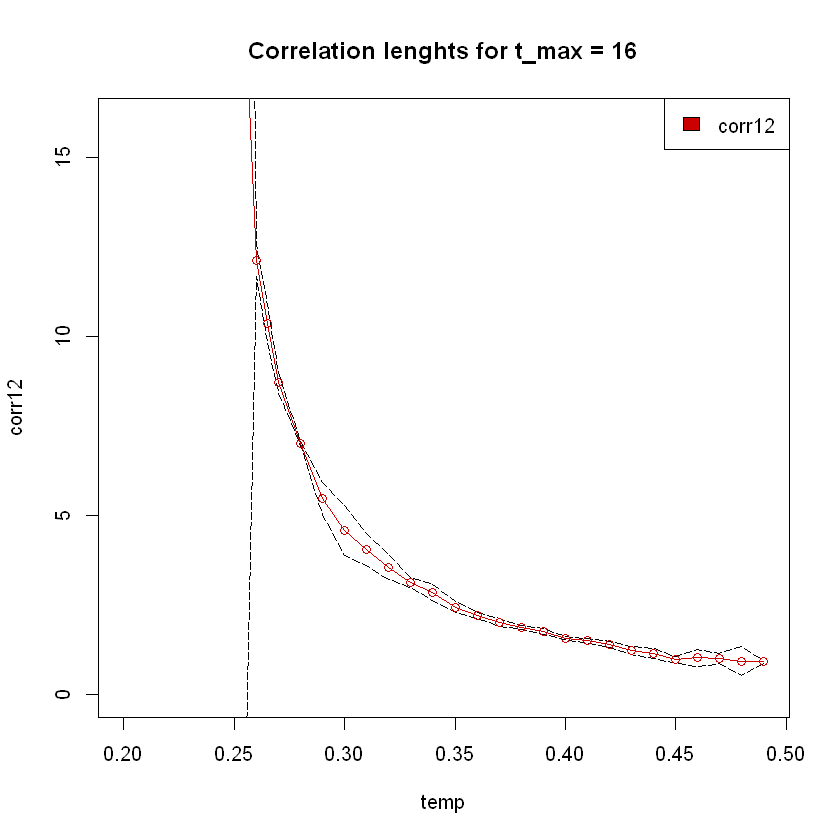

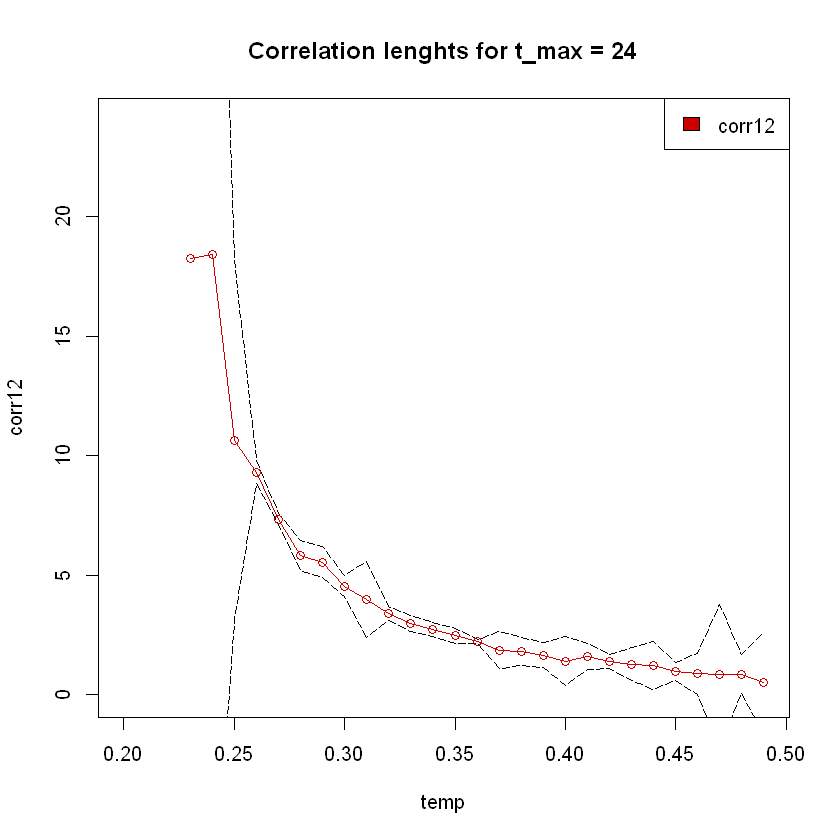

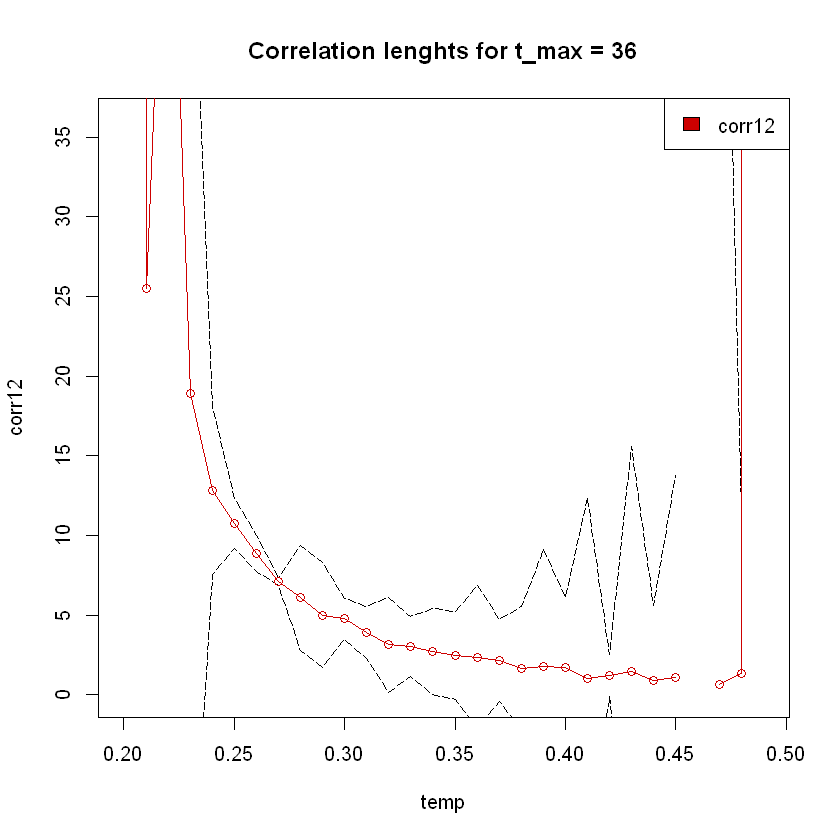

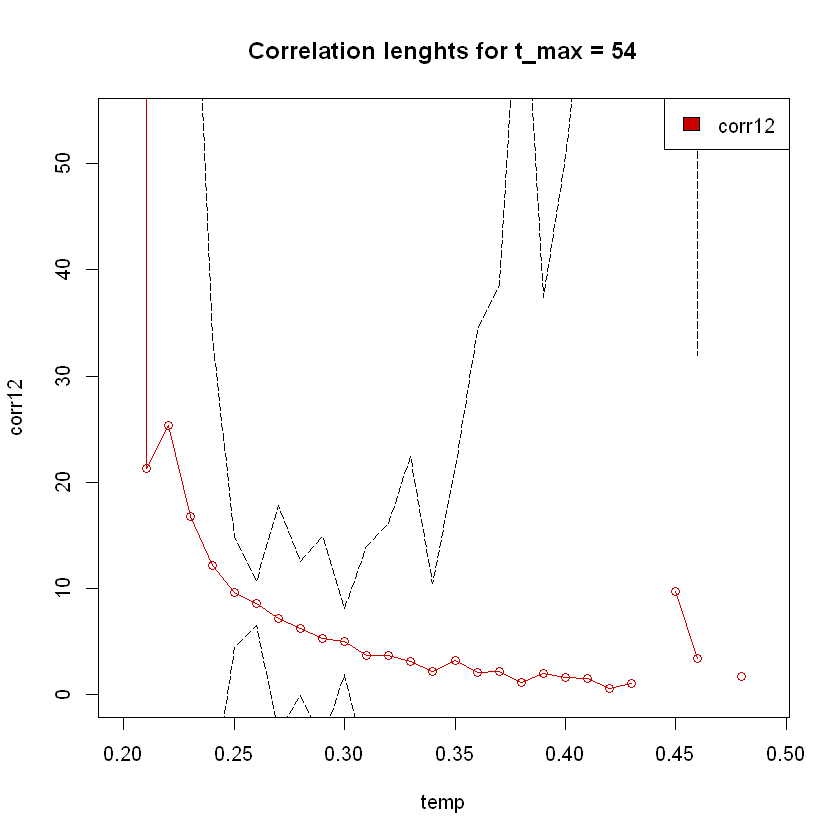

In [ ]:
for (size in c(16, 24, 36, 54)) {
	d <- comp_overview[comp_overview$max_t == size, c("max_t", "temp", "corr12", "corr12_err")]
	plot(corr12 ~ temp, data = d, ylim = c(0, size), col = "red3", type = "o")
	upper <- d$corr12 + d$corr12_err
	lower <- d$corr12 - d$corr12_err
	lines(d$temp, upper, lty = 5)
	lines(d$temp, lower, lty = 5)
	points(corr12 ~ temp, data = d, col = "red3")
	lines(corr12 ~ temp, data = d, col = "red3")
	title(paste("Correlation lenghts for t_max =", size))
	legend <- list(names = c("corr12"), cols = "red3")
	legend("topright", y = legend$names, fill = legend$cols)
}

## Step-scaling functions

Here we plot the step-scaling functions $\xi (1.5 L) / \xi (L) \sim \xi(L) / L$. In a first step, we only utilize the correlation lenghts `corr12`, that only considers the first and second non-zero momentum modes.

,index,max_t,temp,corr12,corr12_err,corr_beta_ratio,corr_beta_ratio_err,corr12_15,corr12_15_err,corr_step_ratio,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,6,16,0.26,12.11,0.4336,0.756875,0.02710000,9.31,0.4746,0.7687861,0.06671723
8,7,16,0.27,8.70,0.2808,0.543750,0.01755000,7.35,0.2213,0.8448276,0.05270432
9,8,16,0.28,7.00,0.0522,0.437500,0.00326250,5.82,0.6160,0.8314286,0.09420008
10,9,16,0.29,5.47,0.4444,0.341875,0.02777500,5.55,0.6462,1.0146252,0.20056663
11,10,16,0.30,4.58,0.7002,0.286250,0.04376250,4.54,0.4366,0.9912664,0.24687439
12,11,16,0.31,4.05,0.4481,0.253125,0.02800625,3.99,1.5985,0.9851852,0.50369419
13,12,16,0.32,3.56,0.3562,0.222500,0.02226250,3.41,0.2942,0.9578652,0.17848078
14,13,16,0.33,3.13,0.1469,0.195625,0.00918125,2.98,0.3180,0.9520767,0.14628117
15,14,16,0.34,2.84,0.2225,0.177500,0.01390625,2.74,0.2847,0.9647887,0.17583292


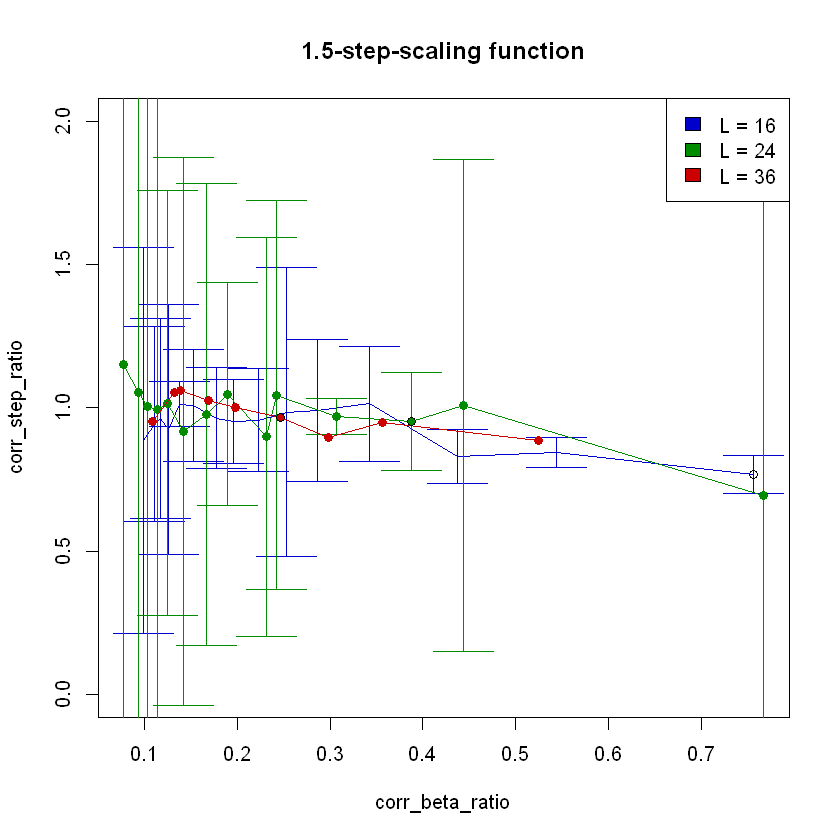

In [ ]:
# Loading data
d <- comp_overview[, c("index", "max_t", "temp", "corr12", "corr12_err")]

# Building the x and y axis data
d$corr_beta_ratio <- d$corr12 / d$max_t
d$corr_beta_ratio_err <- d$corr12_err / d$max_t
d$corr12_15 <- 0
d$corr12_15_err <- 0
for (i in 1:nrow(d)) {
	my_temp <- d$temp[i]
	next_size <- d$max_t[i] * 3 / 2
	d$corr12_15[i] <- ifelse(next_size %in% d$max_t,
		ifelse(my_temp %in% d$temp[d$max_t == next_size],
		d$corr12[d$temp == my_temp & d$max_t == next_size][1], 0), 0)
	d$corr12_15_err[i] <- ifelse(next_size %in% d$max_t,
		ifelse(my_temp %in% d$temp[d$max_t == next_size],
		d$corr12_err[d$temp == my_temp & d$max_t == next_size][1], 0), 0)
}
d <- d[d$corr12_15 != 0, ]
d$corr_step_ratio <- d$corr12_15 / d$corr12
d$corr_step_ratio_err <- d$corr12_err * abs(d$corr12_15 / (d$corr12 * d$corr12) )
d$corr_step_ratio_err <- d$corr_step_ratio_err + d$corr12_15_err / abs(d$corr12)

#d <- d[d$corr12 <= d$max_t, ]

d16 <- d[d$max_t == 16, ]
d24 <- d[d$max_t == 24, ]
d36 <- d[d$max_t == 36, ]

d16 <- d16[d16$temp >= 0.26 & d16$temp <= 0.40, ]
d24 <- d24[d24$temp >= 0.24 & d24$temp <= 0.37, ]
d36 <- d36[d36$temp >= 0.23 & d36$temp <= 0.31, ]

d16
#d24
#d36

dat <- rbind(d16, d24, d36)

plot(
	corr_step_ratio ~ corr_beta_ratio,
	data = d16,
	col = "blue3",
	type = "l",
	pch = 19,
	xlim = c(min(dat$corr_beta_ratio), max(dat$corr_beta_ratio)),
	#ylim = c(min(dat$corr_step_ratio), max(dat$corr_step_ratio))
	ylim = c(0, 2)
)
if(TRUE) arrows(d16$corr_beta_ratio,
	d16$corr_step_ratio + d16$corr_step_ratio_err,
	d16$corr_beta_ratio,
	d16$corr_step_ratio - d16$corr_step_ratio_err,
	code = 3, angle = 90, col = "blue3"
)
if(FALSE) arrows(d16$corr_beta_ratio + d16$corr_beta_ratio_err,
	d16$corr_step_ratio,
	d16$corr_beta_ratio - d16$corr_beta_ratio_err,
	d16$corr_step_ratio,
	code = 3, angle = 90, col = "blue3"
)
if(TRUE) {
	points(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 19)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 19)
	if(TRUE) arrows(d24$corr_beta_ratio,
	d24$corr_step_ratio + d24$corr_step_ratio_err,
	d24$corr_beta_ratio,
	d24$corr_step_ratio - d24$corr_step_ratio_err,
	code = 3, angle = 90, col = "green4"
)
}
if(TRUE) {
	points(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 19)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 19)
	if(FALSE) arrows(d36$corr_beta_ratio,
	d36$corr_step_ratio + d36$corr_step_ratio_err,
	d36$corr_beta_ratio,
	d36$corr_step_ratio - d36$corr_step_ratio_err,
	code = 3, angle = 90, col = "red3"
)
}
title("1.5-step-scaling function")
legend("topright", y = c("L = 16", "L = 24", "L = 36"), fill = c("blue3", "green4", "red3"))
points(d$corr_beta_ratio[d$temp == 0.26], d$corr_step_ratio[d$temp == 0.26])

## Compounded correlation functions

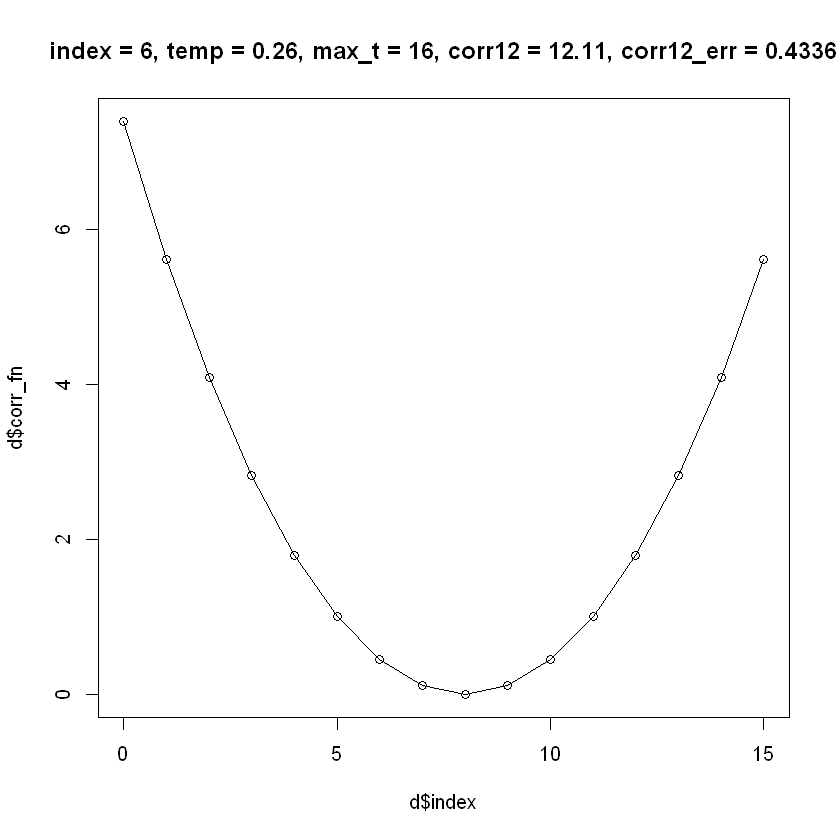

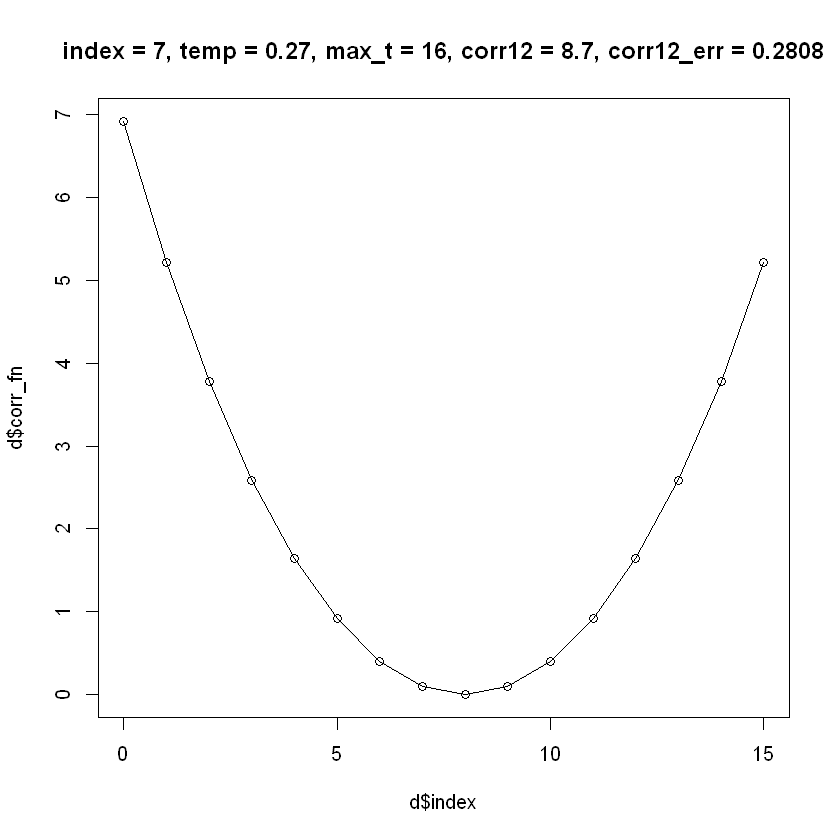

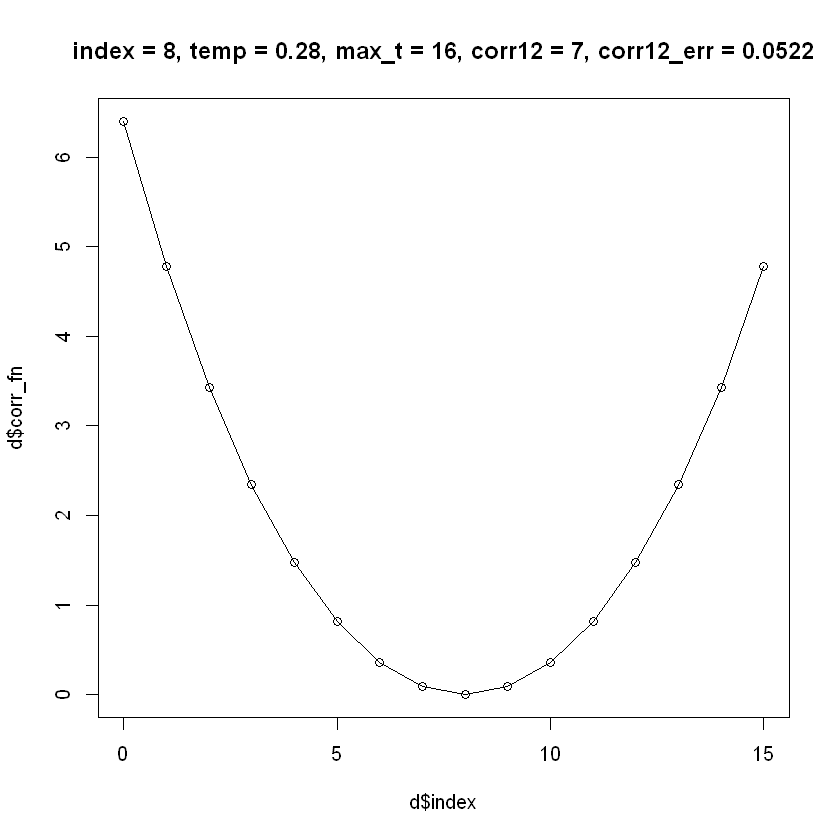

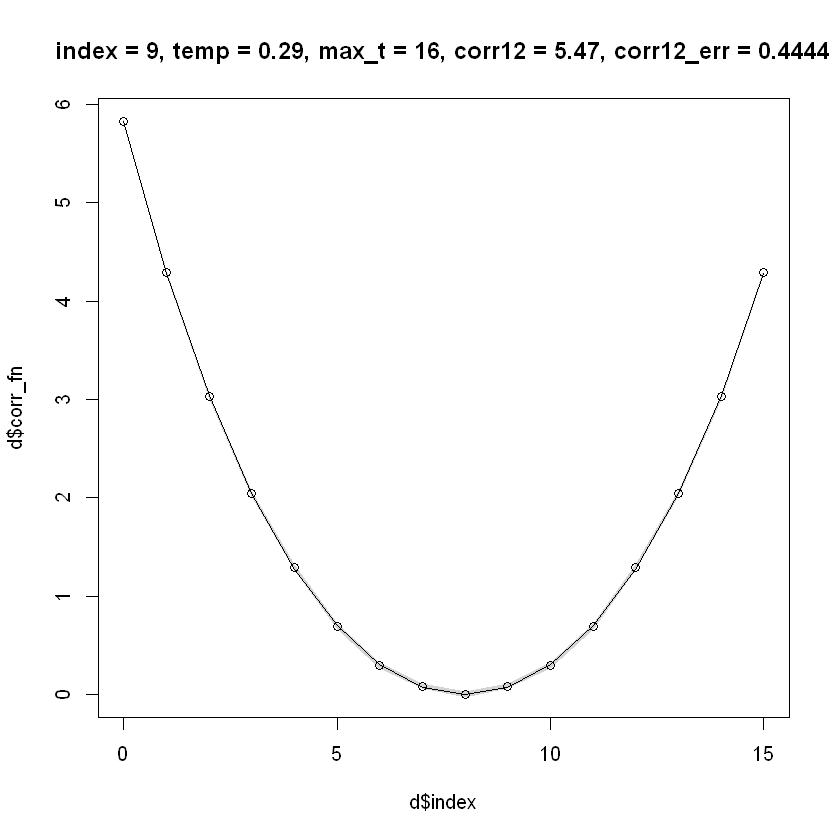

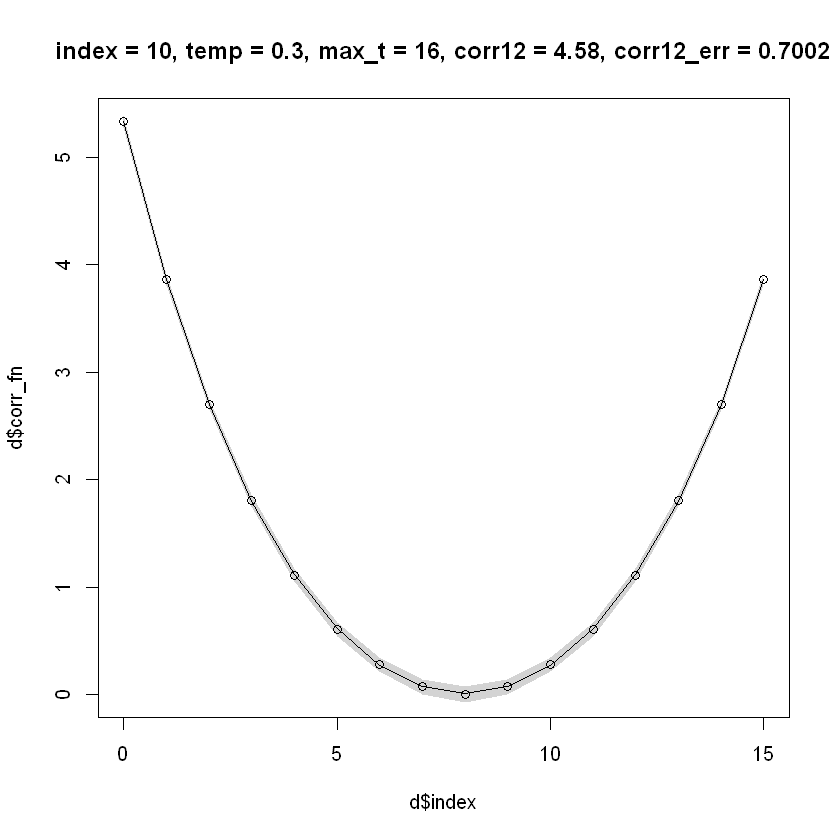

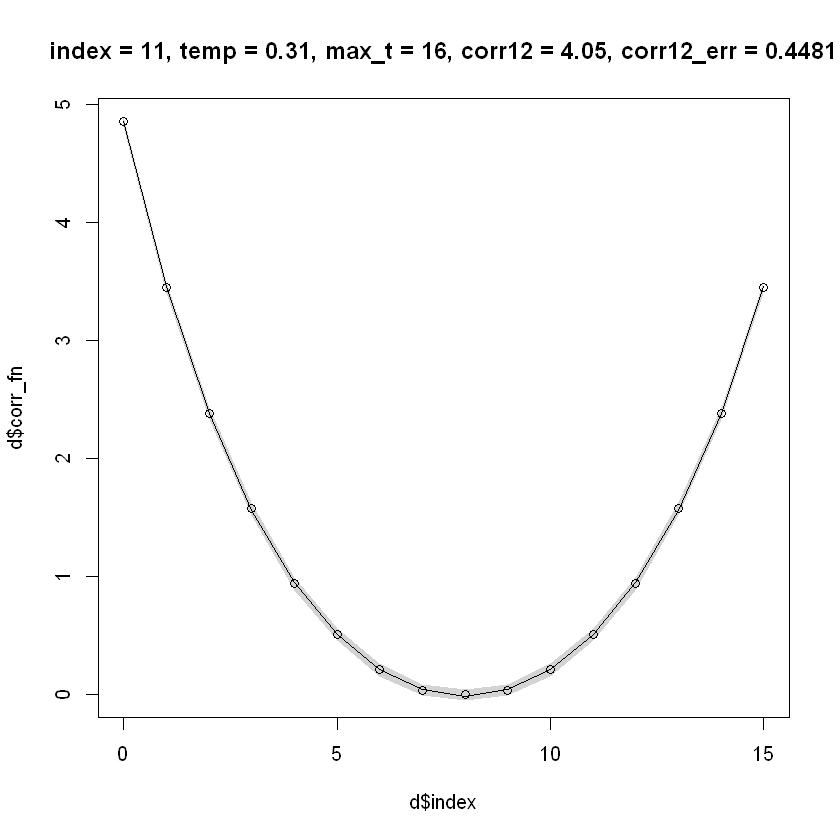

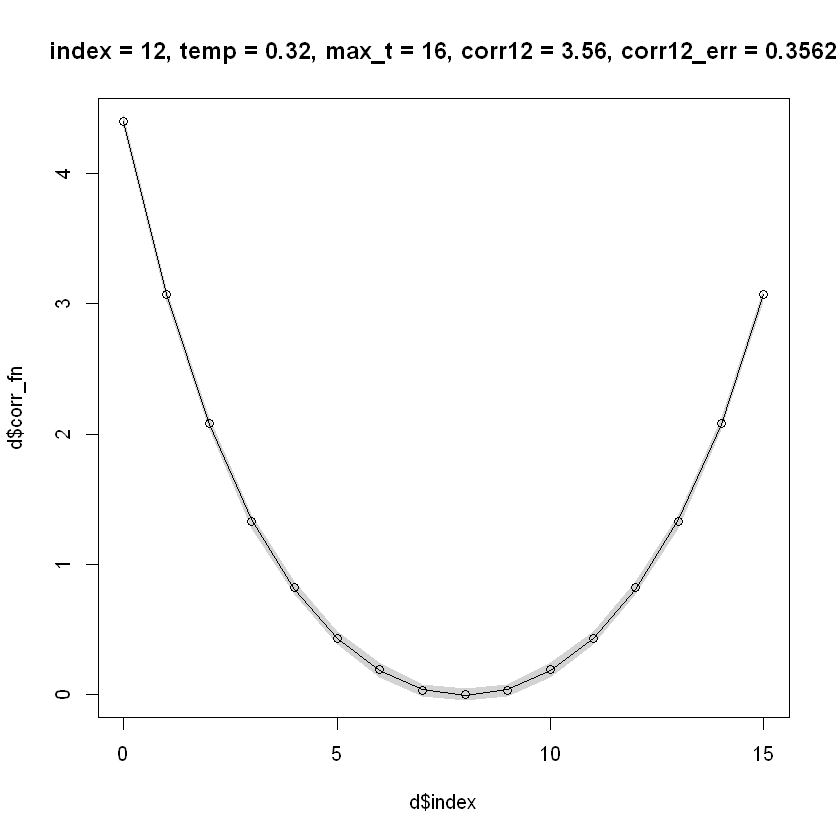

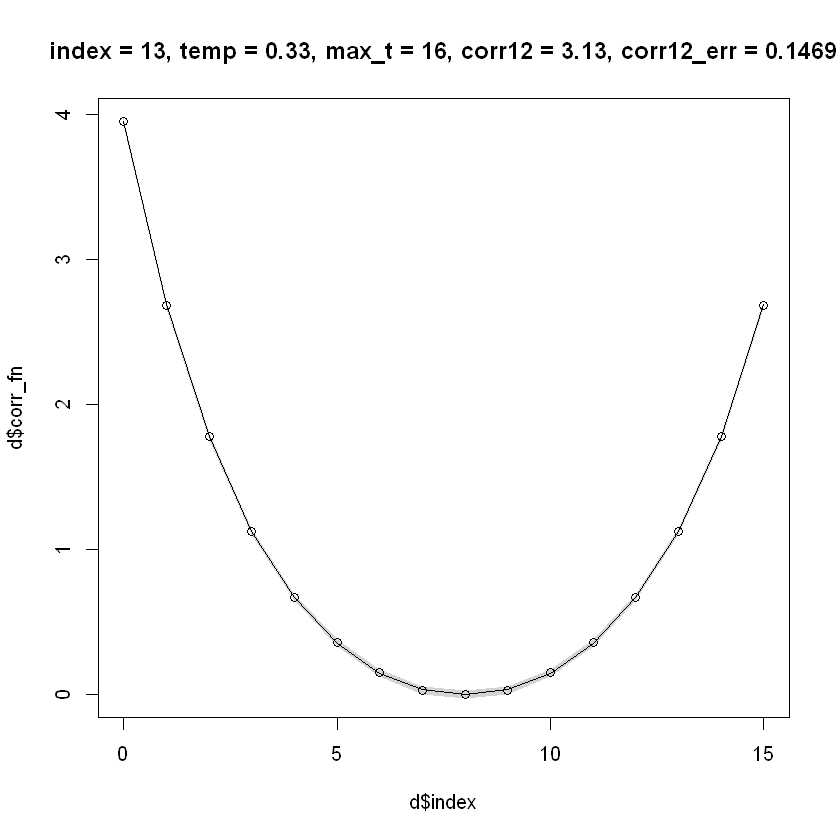

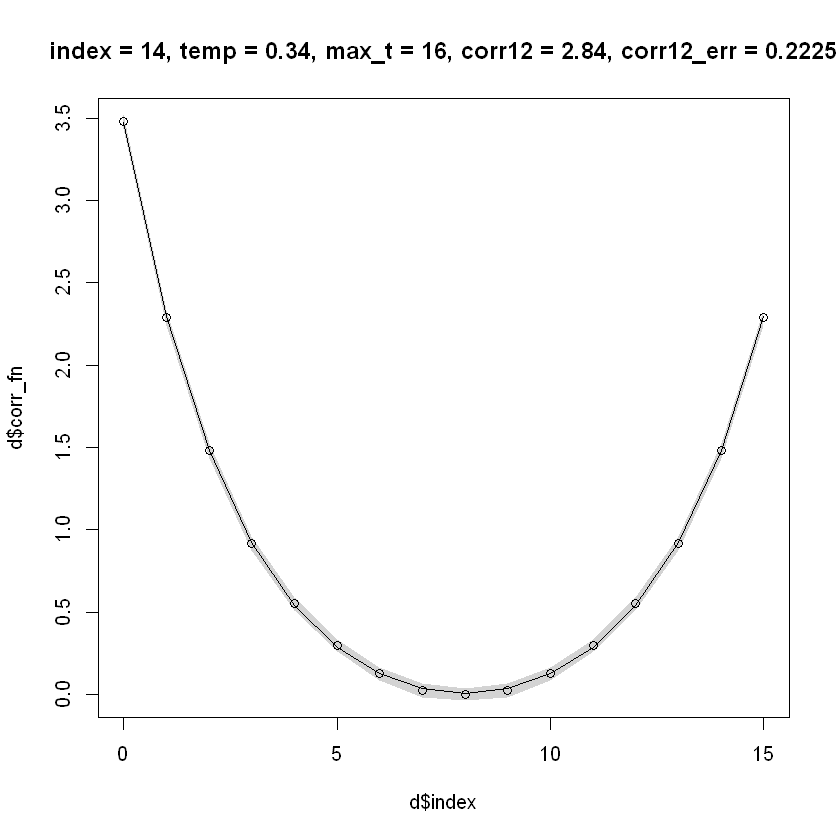

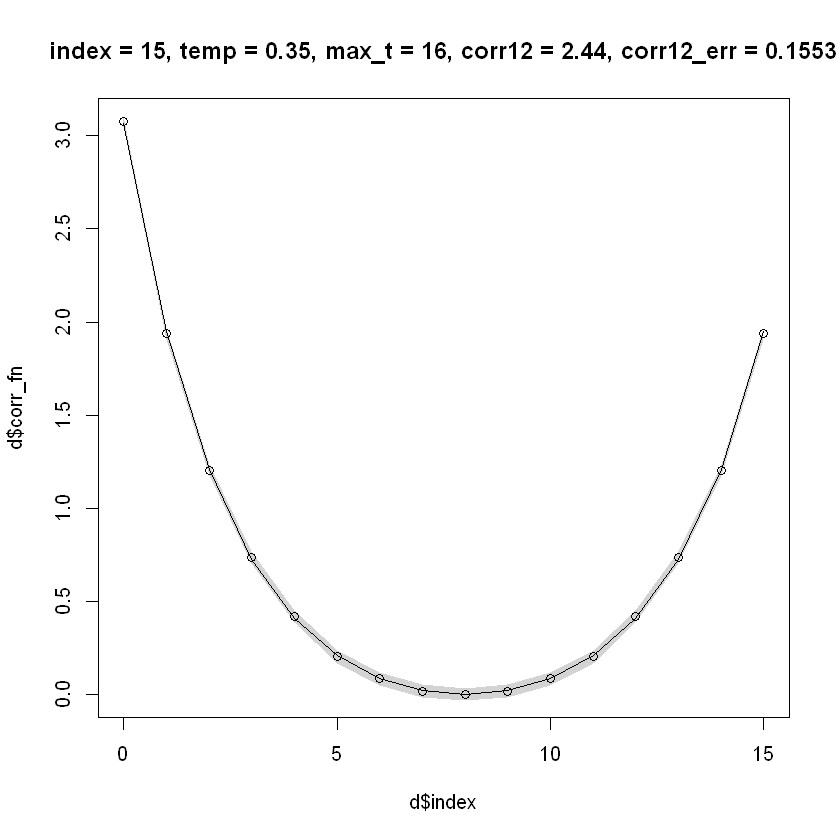

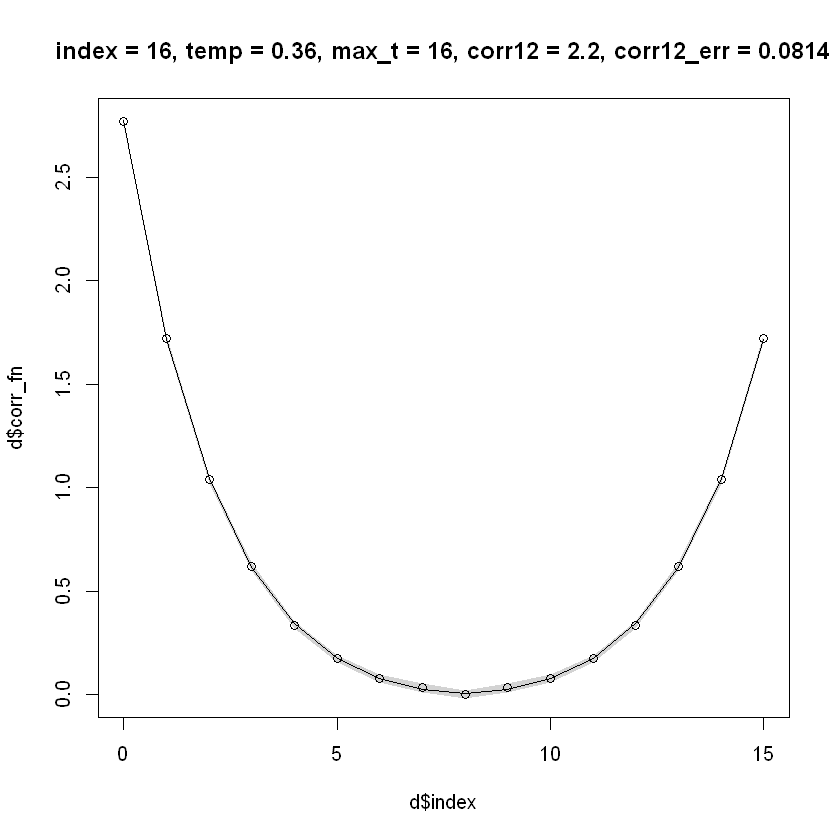

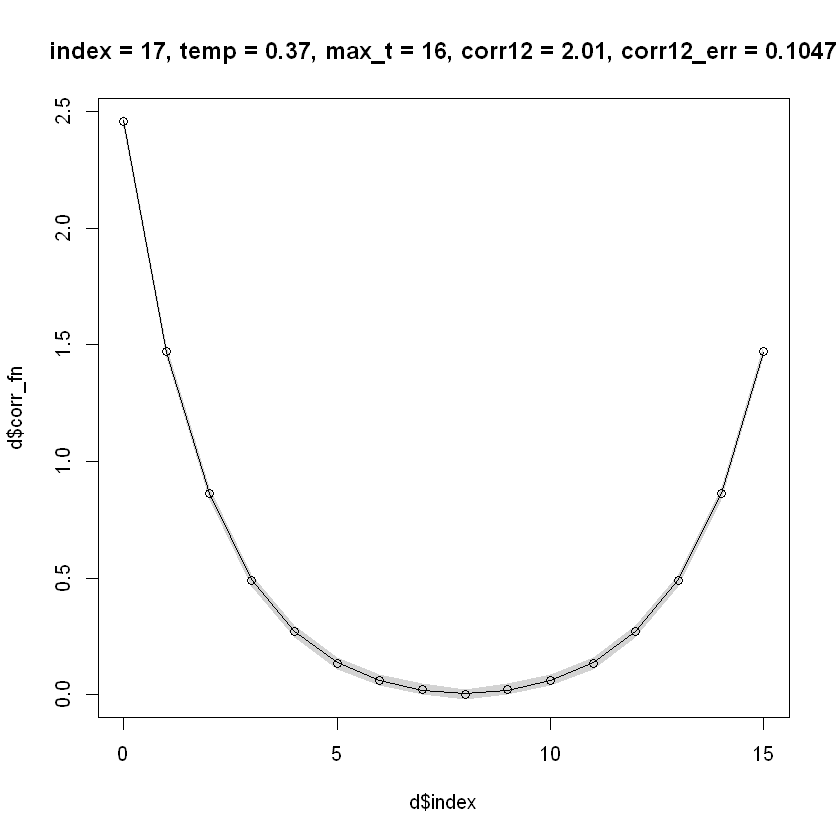

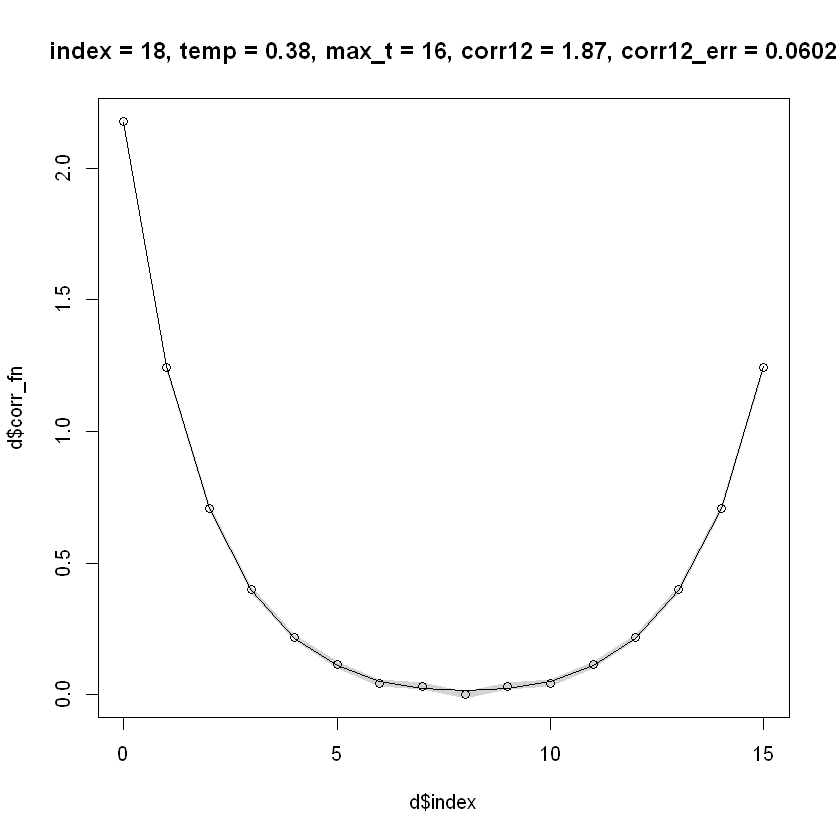

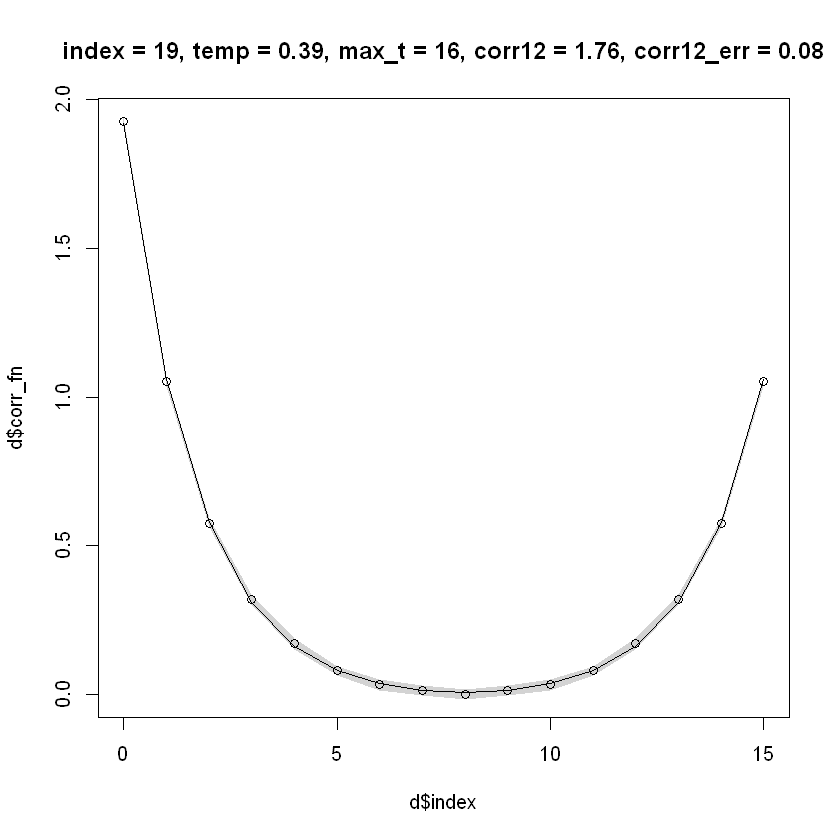

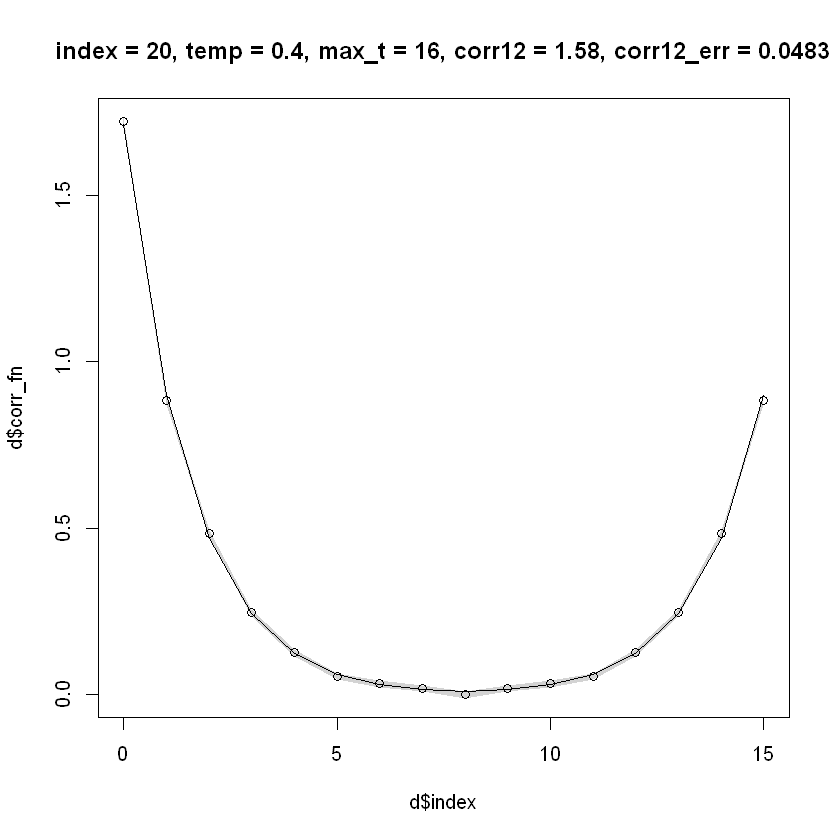

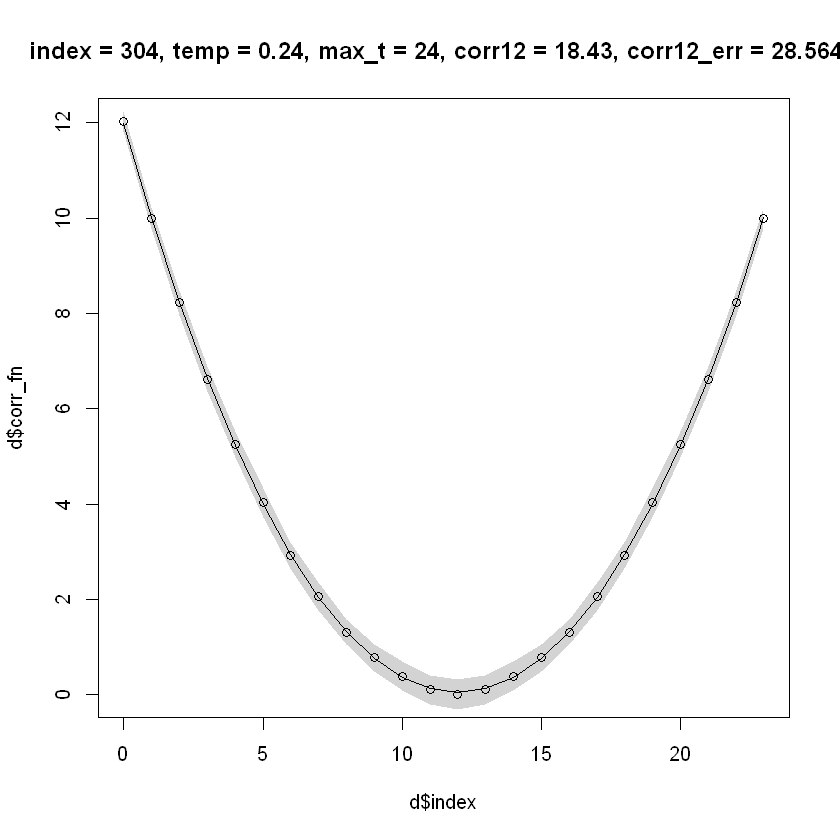

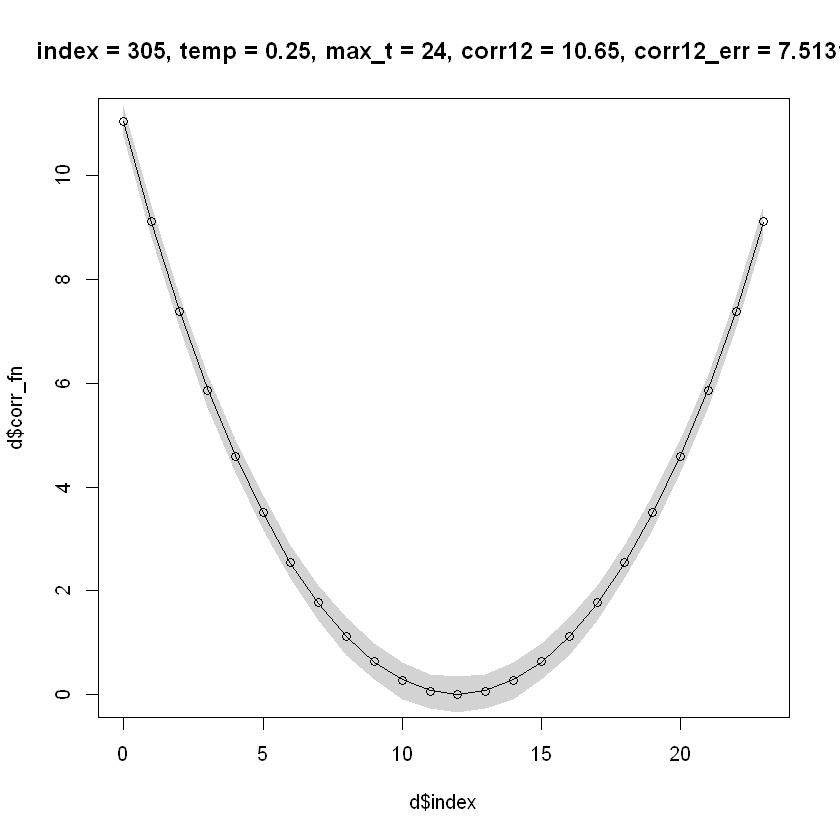

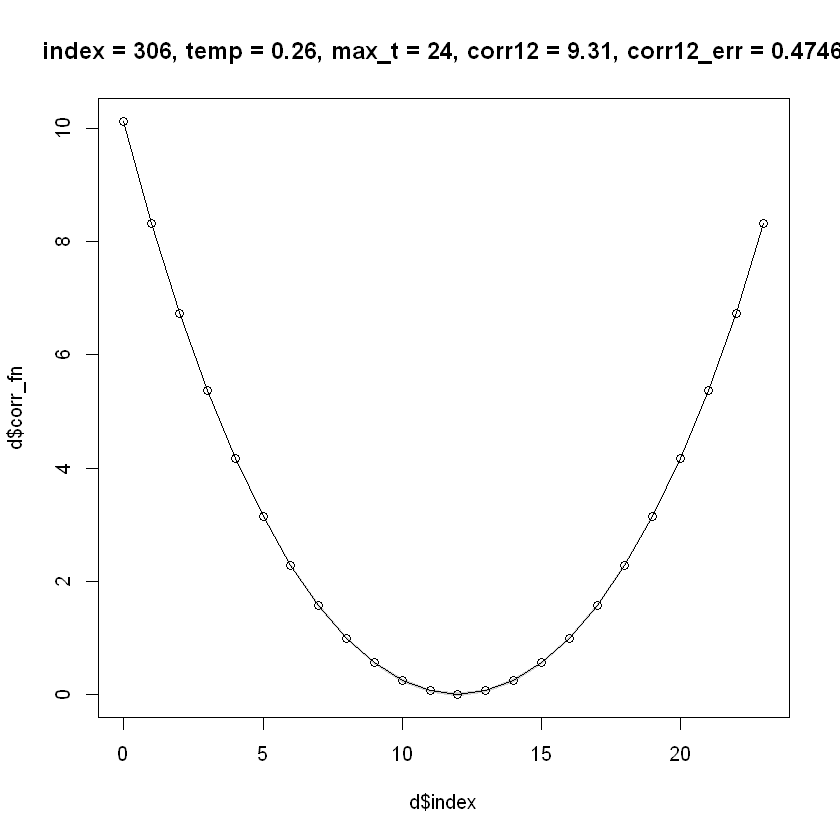

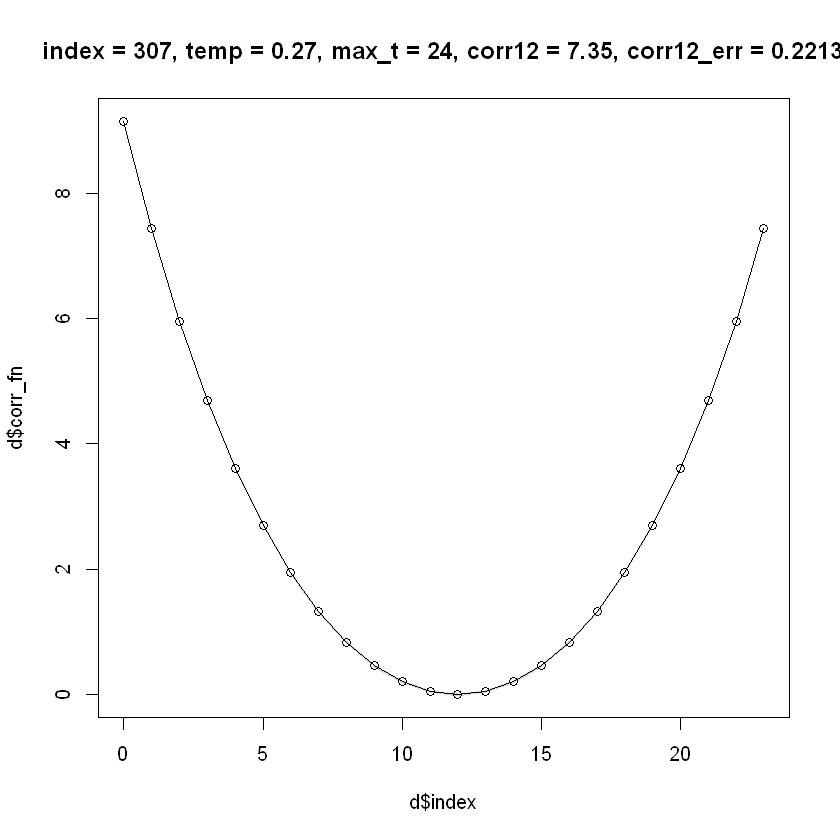

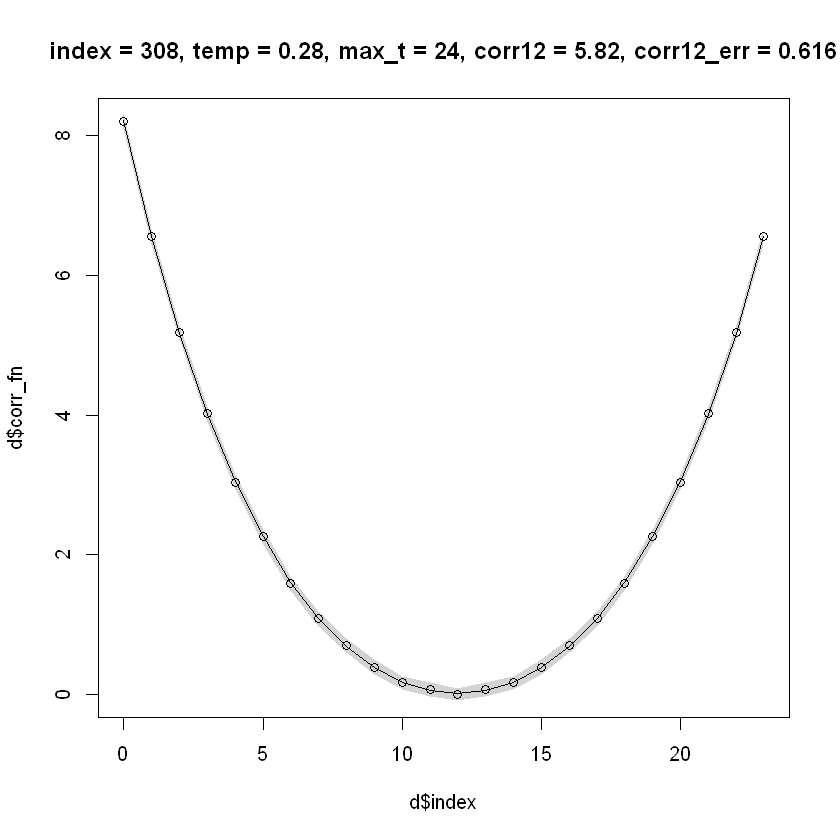

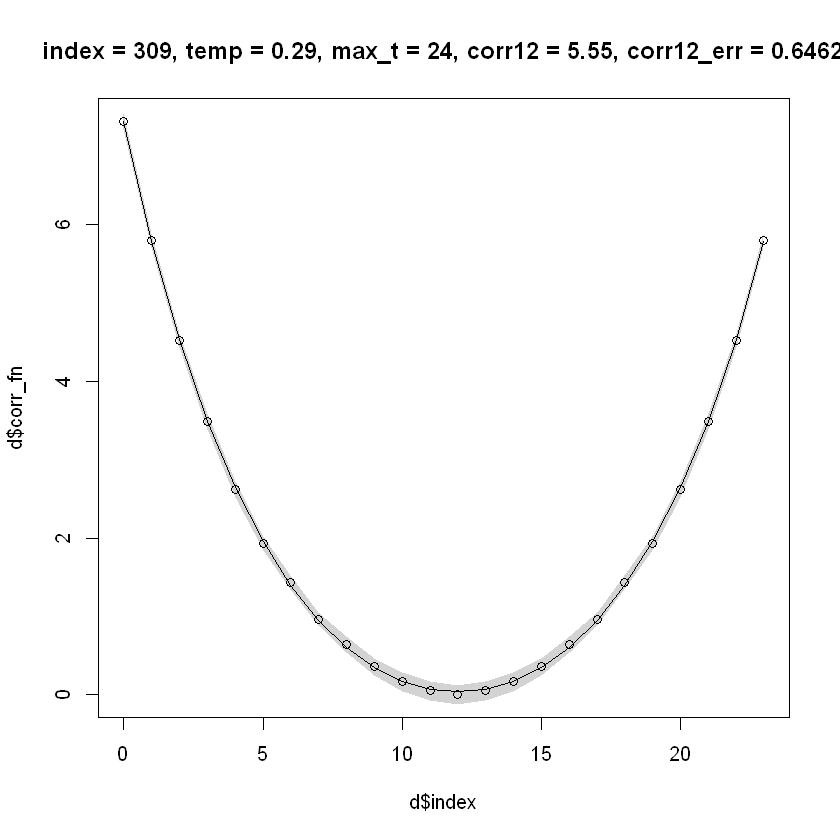

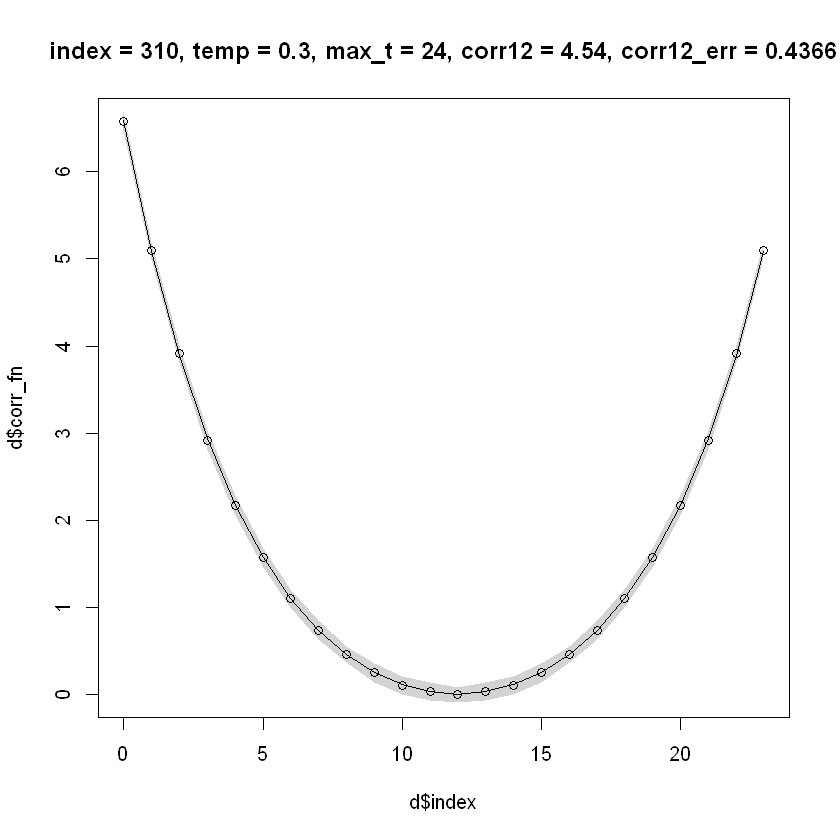

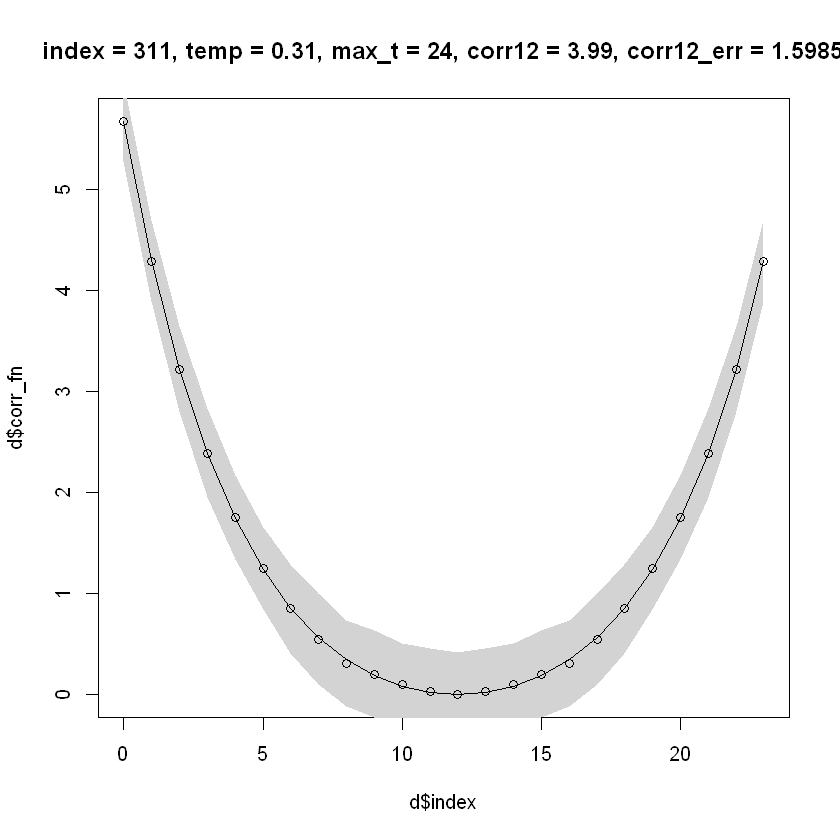

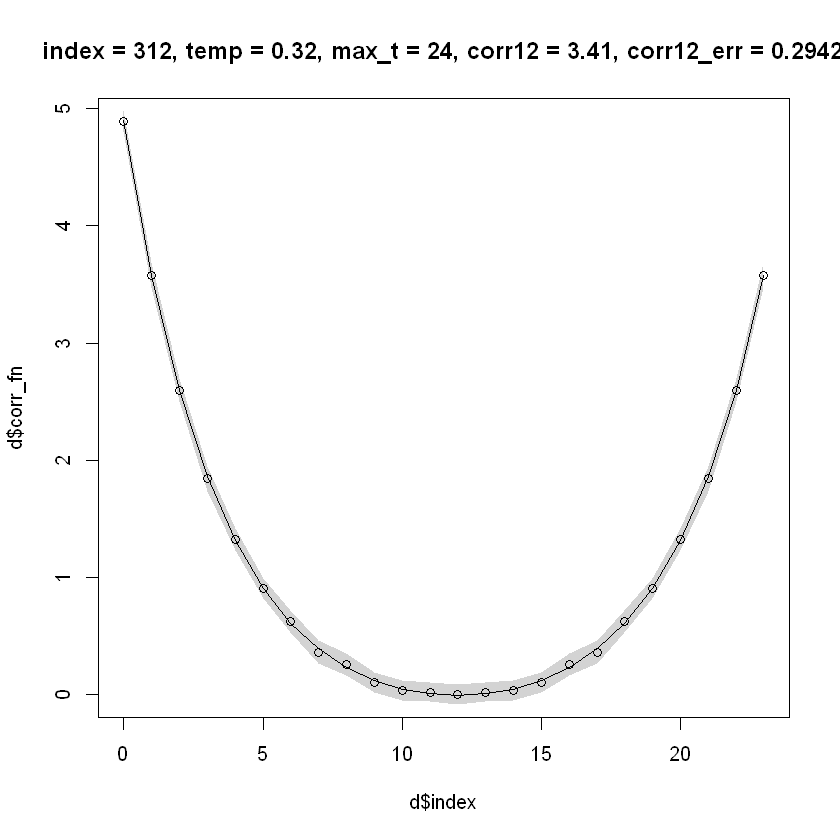

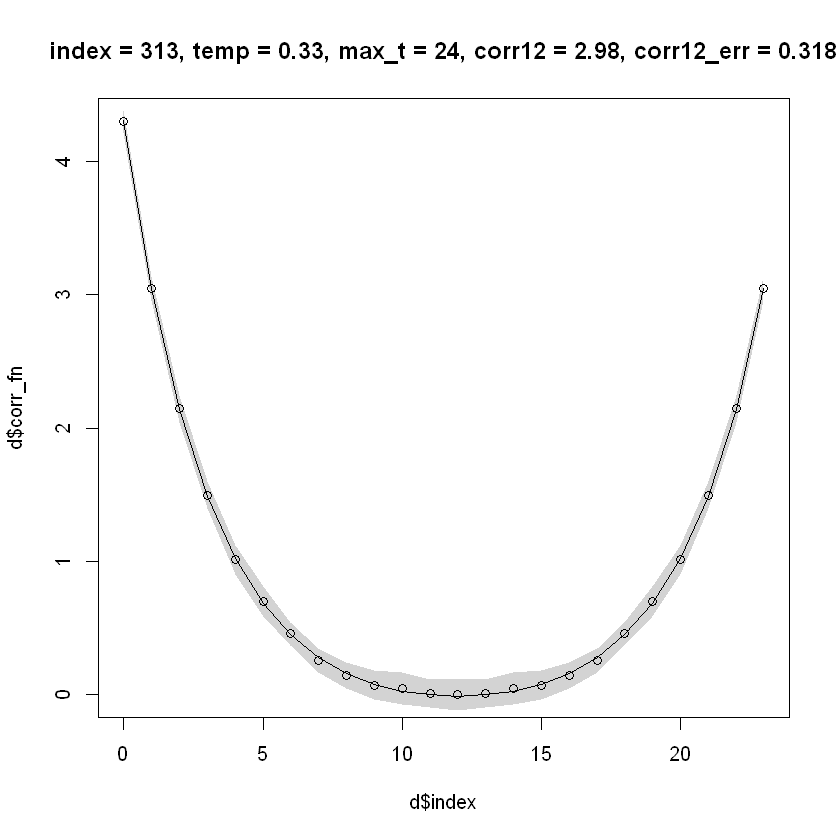

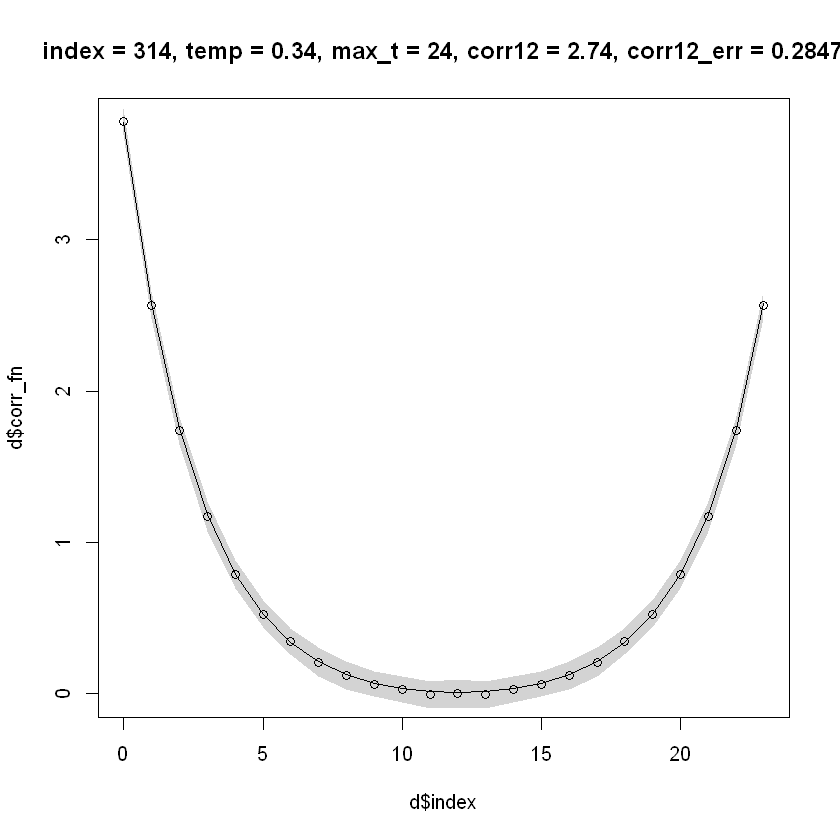

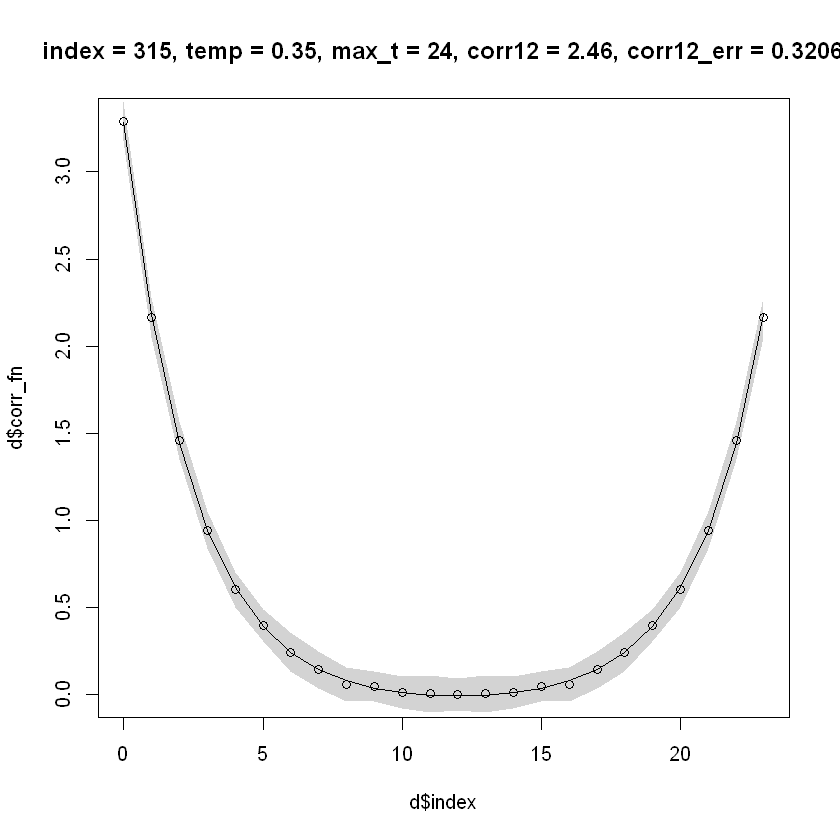

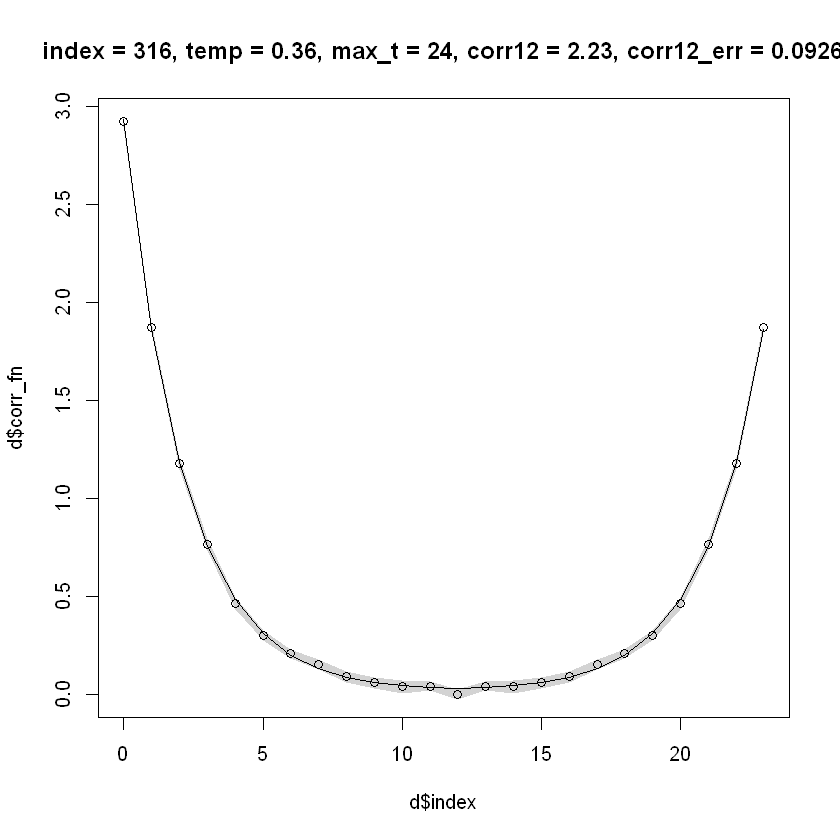

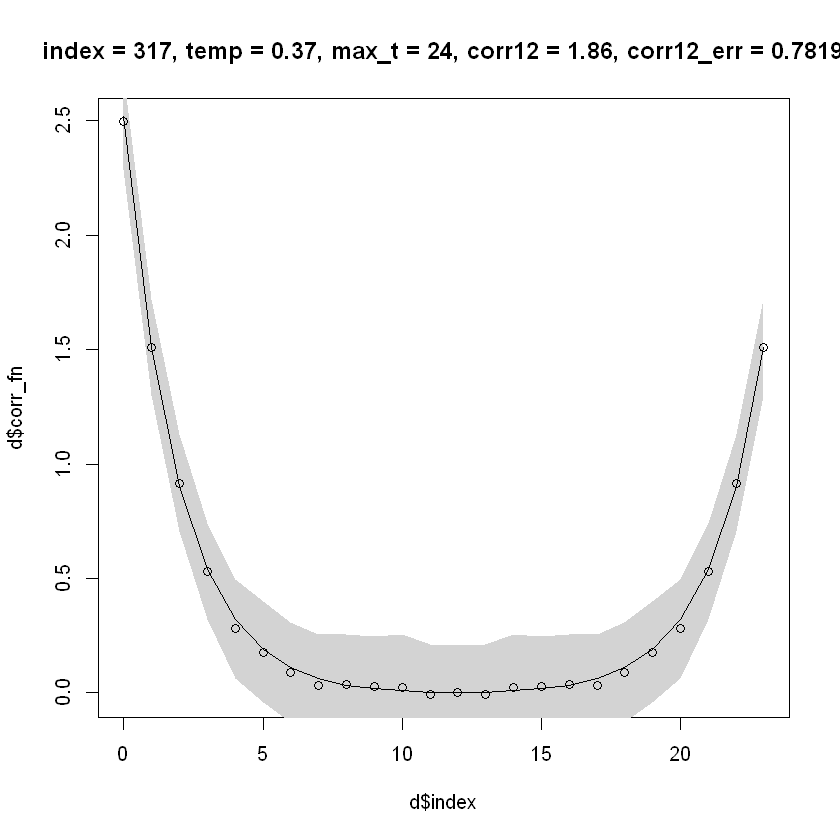

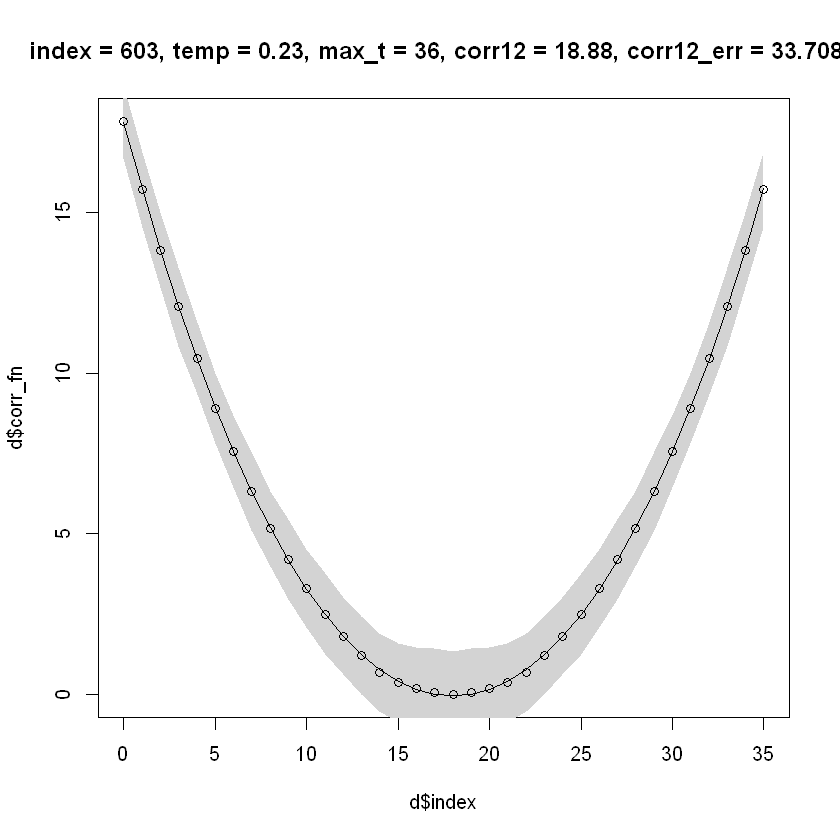

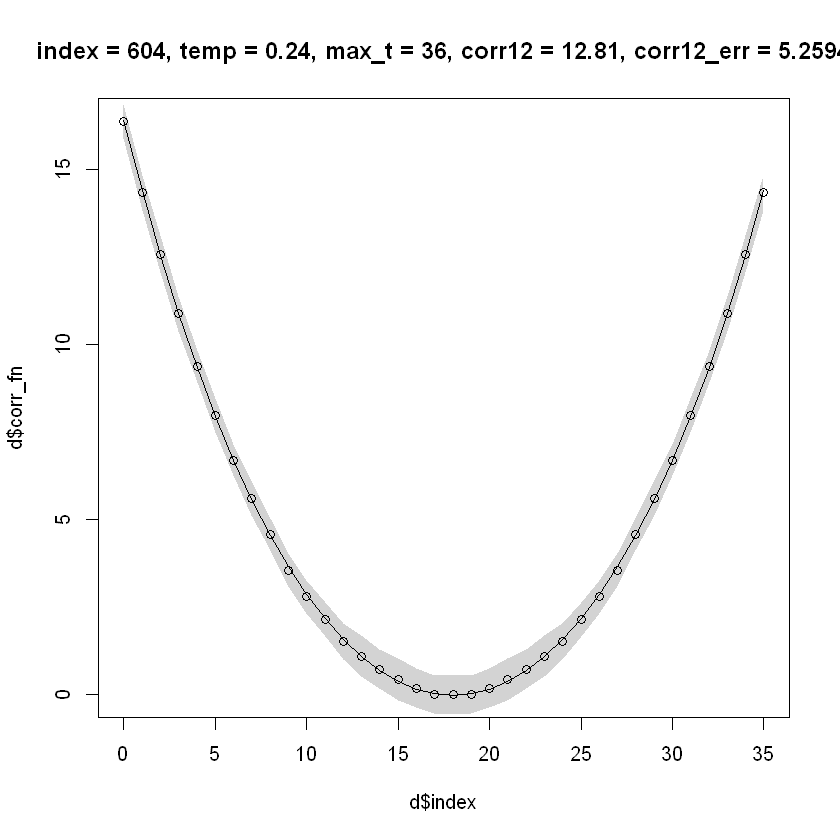

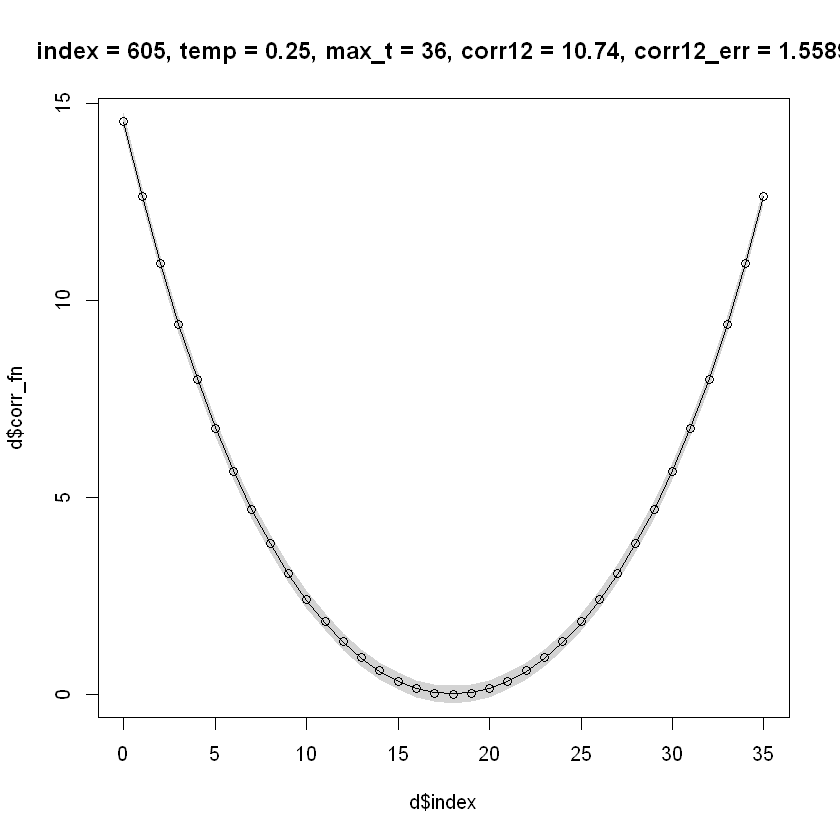

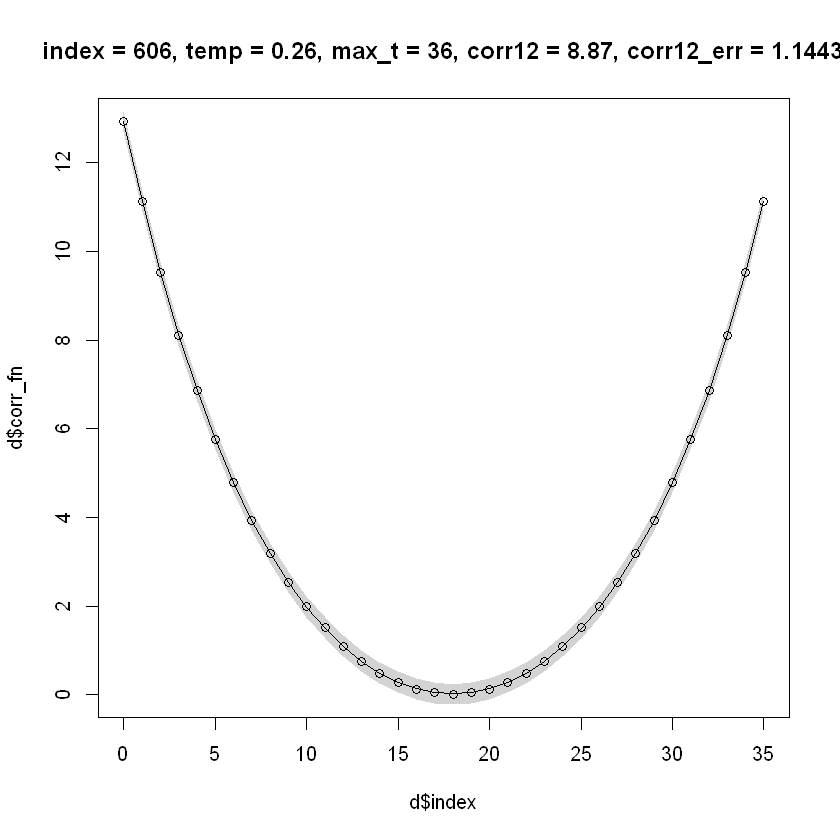

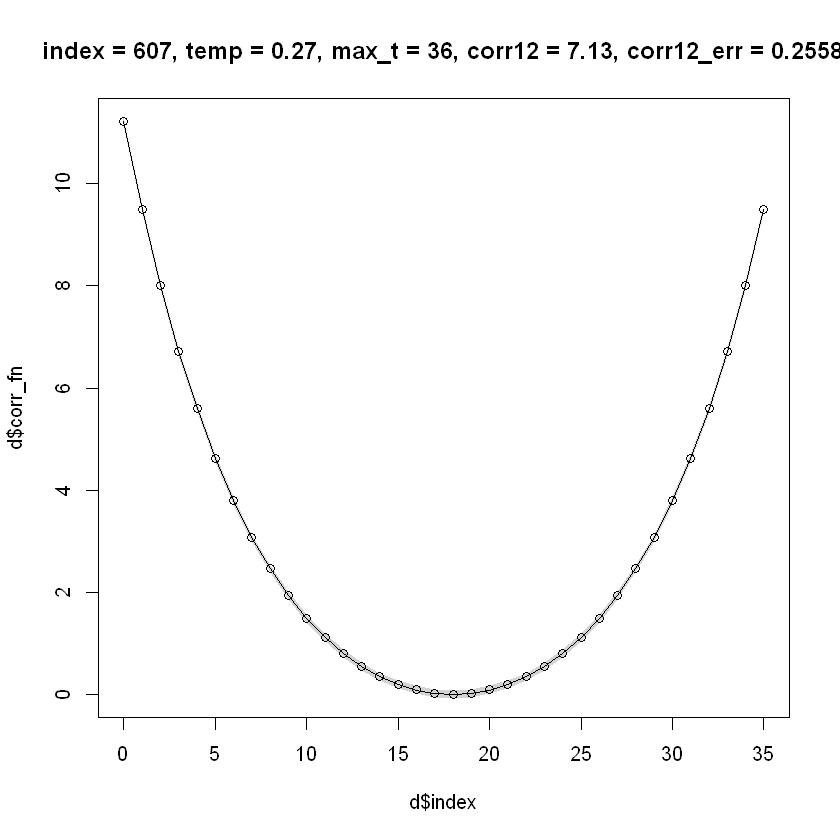

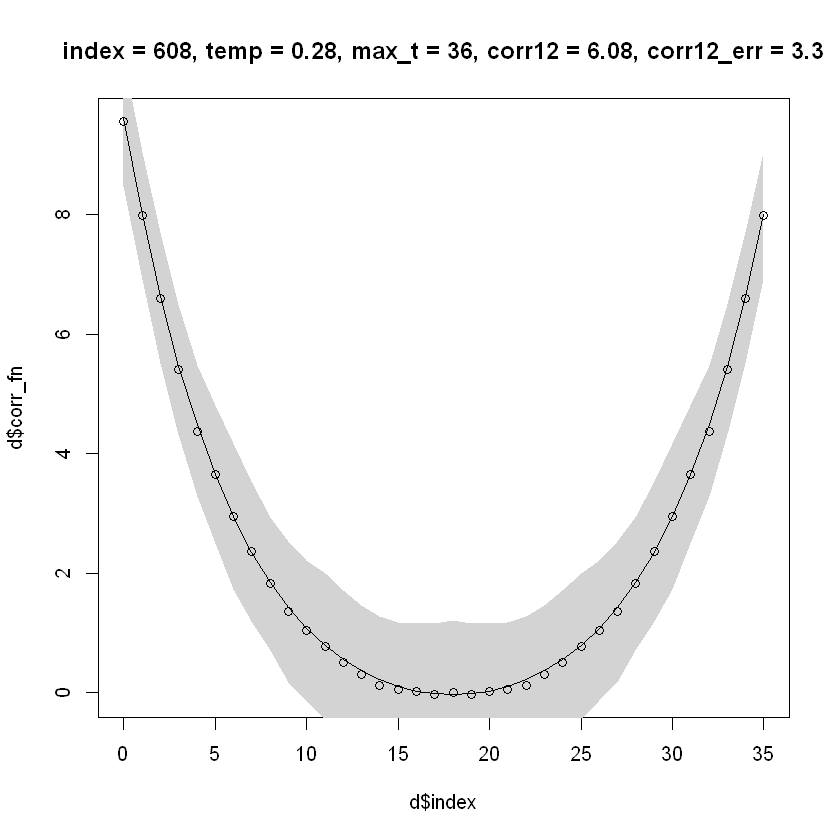

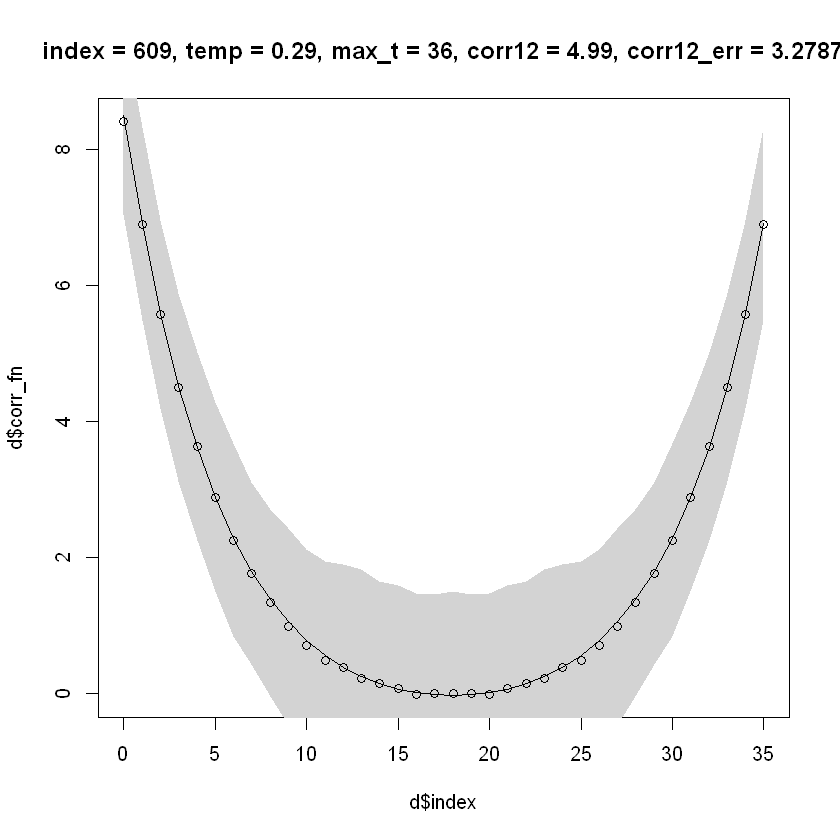

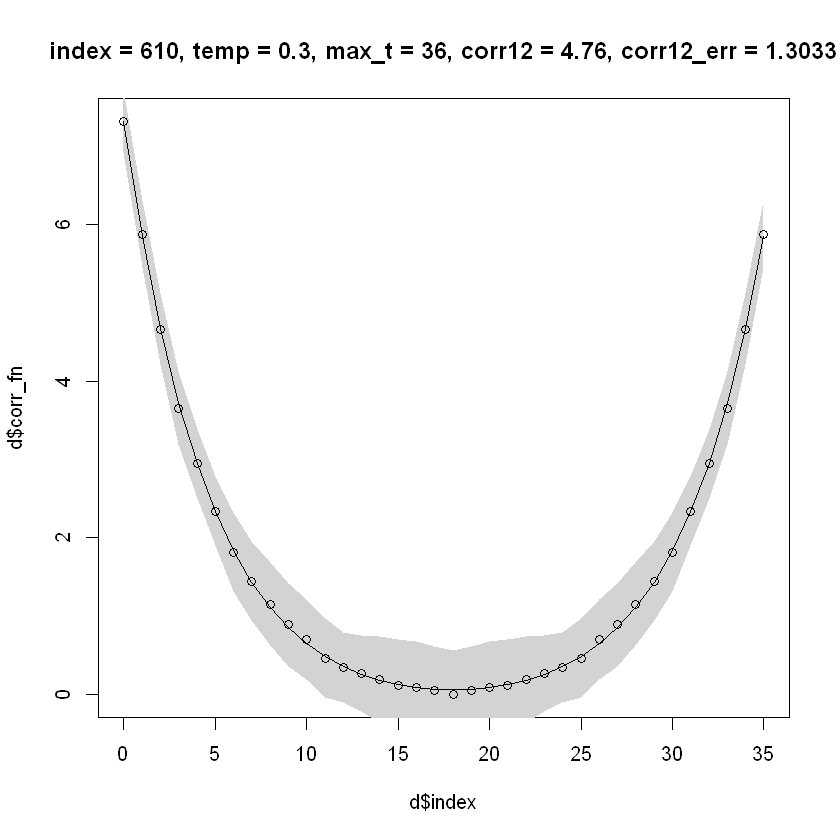

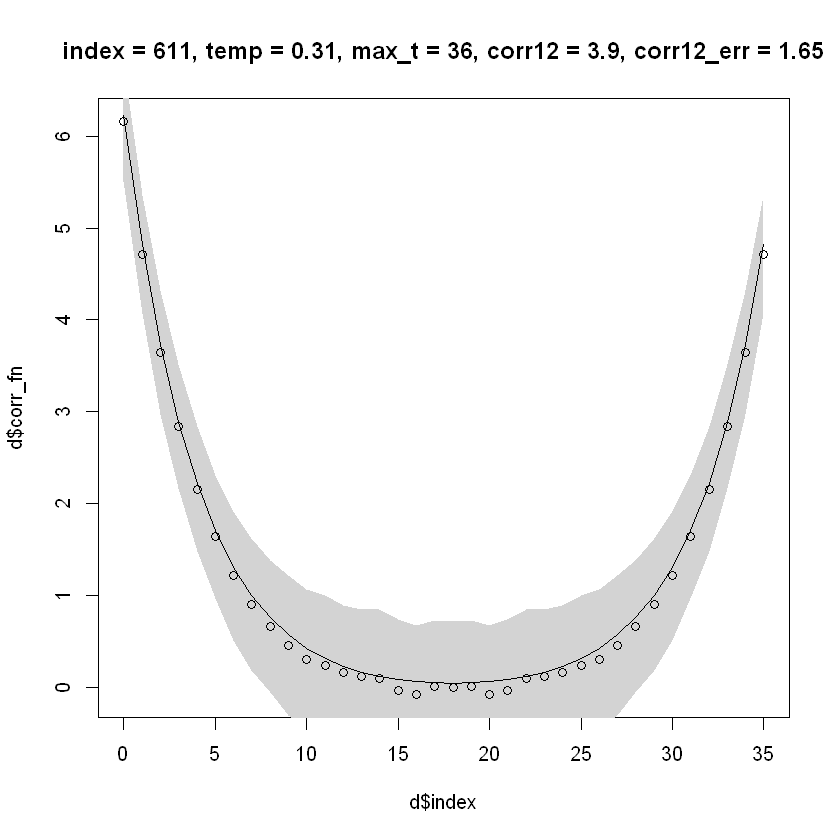

In [ ]:
indices <- dat$index
for (index in indices) {
	d <- read.csv(paste("..\\data\\plot_data\\comp_correlation_data\\correlation_", index, ".csv", sep = ""), header = FALSE)
	colnames(d) <- c("corr_fn")
	d$index <- 1:nrow(d) - 1
	d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

	d$sym_corr_fn <- d$corr_fn
	for (i in 1:(nrow(d) - 1)) {
		d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
	}
	d$corr_fn <- d$sym_corr_fn

	params <- fit[fit$index == index, ]
	d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b
	plot(d$index, d$corr_fn)
	title(paste("index = ", index,
		", temp = ", round(comp_overview$temp[comp_overview$index == index],  digits = 3),
		", max_t = ", comp_overview$max_t[comp_overview$index == index],
		", corr12 = ", comp_overview$corr12[comp_overview$index == index],
		", corr12_err = ", comp_overview$corr12_err[comp_overview$index == index], sep = ""))
	
	d_err <- read.csv(paste("..\\data\\plot_data\\comp_correlation_data\\correlation_", index, "_err.csv", sep = ""), header = FALSE)
	colnames(d_err) <- c("err")
	d$err <- d_err$err
	d$upper <- d$corr_fn + d$err
	d$lower <- d$corr_fn - d$err
	y_shade <- c()
	for (entry in d$upper) {
		y_shade <- append(y_shade, entry)
	}
	for (entry in rev(d$lower)) {
		y_shade <- append(y_shade, entry)
	}
	x_shade <- c(d$index, rev(d$index))
	polygon(x_shade, y_shade, col = "lightgray", lty = 0)
	points(d$index, d$corr_fn)
	lines(d$index, d$fit)
}